In [37]:
import pandas as pd
import yfinance as yf
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [38]:
all_calls = pd.read_csv('all_calls_progress.csv', index_col = 0)
all_calls['date'] = all_calls['date'].apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
all_calls = all_calls.reset_index()
all_calls

year_quarter                             earnings_call_raw_text  \
0     2025-year/2-quarter  \nAug 5, 2025\nO\nOperator\nGood morning, and ...   
1     2015-year/1-quarter  \nMay 5, 2015\nE\nExecutives\nMark Schweitzer ...   
2     2019-year/4-quarter  \nJan 30, 2020\nO\nOperator\nLadies and gentle...   
3     2019-year/3-quarter  \nOct 31, 2019\nO\nOperator\nLadies and gentle...   
4     2019-year/2-quarter  \nAug 1, 2019\nO\nOperator\nGood morning, and ...   
...                   ...                                                ...   
2169  2017-year/2-quarter  \nJul 28, 2017\nExecutives\nKrista Kochivar - ...   
2170  2025-year/3-quarter  Toggle navigation menu\nSearch\n⌘\nK\nToggle t...   
2171  2019-year/4-quarter  \nJan 31, 2020\nOperator\nLadies and gentlemen...   
2172  2025-year/2-quarter  \nJul 25, 2025\nOperator\nGreetings, and welco...   
2173  2025-year/4-quarter  Toggle navigation menu\nSearch\n⌘\nK\nToggle t...   

     ticker       date                                      analysis_json  \
0       ADM 2025-04-01  {\n  "forward_looking_sentiment": 0.6,\n  "man...   
1       ADM 2015-01-01  {\n  "forward_looking_sentiment": 0,\n  "manag...   
2       ADM 2019-10-01  {\n  "forward_looking_sentiment": 0,\n  "manag...   
3       ADM 2019-07-01  {\n  "forward_looking_sentiment": 0,\n  "manag...   
4       ADM 2019-04-01  {\n  "forward_looking_sentiment": 0,\n  "manag...   
...     ...        ...                                                ...   
2169     WY 2017-04-01  {\n  "forward_looking_sentiment": 0.4,\n  "man...   
2170     WY 2025-07-01  {\n  "forward_looking_sentiment": 0,\n  "manag...   
2171     WY 2019-10-01  {\n  "forward_looking_sentiment": 0.3,\n  "man...   
2172     WY 2025-04-01  {\n  "forward_looking_sentiment": 0.4,\n  "man...   
2173     WY 2025-10-01  {\n  "forward_looking_sentiment": 0,\n  "manag...   

      forward_looking_sentiment  management_confidence  risk_and_uncertainty  \
0                           0.6                    0.6                  0.20   
1                           0.0                    0.0                  0.00   
2                           0.0                    0.0                  0.00   
3                           0.0                    0.0                  0.00   
4                           0.0                    0.0                  0.00   
...                         ...                    ...                   ...   
2169                        0.4                    0.5                  0.20   
2170                        0.0                    0.0                  0.00   
2171                        0.3                    0.5                  0.20   
2172                        0.4                    0.5                 -0.25   
2173                        0.0                    0.0                  0.00   

      qa_sentiment  opening_sentiment  financial_performance_sentiment  \
0              0.2                0.4                              0.6   
1              0.0                0.0                              0.0   
2              0.0                0.0                              0.0   
3              0.0                0.0                              0.0   
4              0.0                0.0                              0.0   
...            ...                ...                              ...   
2169           0.1                0.4                              0.4   
2170           0.0                0.0                              0.0   
2171           0.2                0.3                              0.3   
2172           0.1                0.3                              0.4   
2173           0.0                0.0                              0.0   

      macroeconomic_reference_sentiment  
0                                 -0.10  
1                                  0.00  
2                                  0.00  
3                                  0.00  
4                                  0.00  
...                      

In [39]:
score_columns = [
    "forward_looking_sentiment",
    "management_confidence",
    "risk_and_uncertainty",
    "qa_sentiment",
    "opening_sentiment",
    "financial_performance_sentiment",
    "macroeconomic_reference_sentiment"
]

# --- Risk & sizing params ----------------------------------------------------
POSITION_SIZE = 0.65   # fraction of capital per trade
STOP_LOSS     = 0.15   # 20% sign-adjusted loss
TAKE_PROFIT   = 0.50   # 50% sign-adjusted gain
USE_TRAILING  = False
TRAIL_GIVEUP  = 0.10   # 10% giveback from max favorable move

In [40]:
all_calls = all_calls.fillna(0)
earnings_call_df = all_calls
earnings_call_df['overall_sentiment'] = earnings_call_df[score_columns].mean(axis = 1)

earnings_call_df = earnings_call_df[['date', 'ticker', 'overall_sentiment']]

del all_calls

In [41]:
price_df = yf.download(earnings_call_df.ticker.unique().tolist(), start=earnings_call_df['date'].min() - pd.Timedelta(days=10), end=earnings_call_df['date'].max() + pd.Timedelta(days=10))
price_df = price_df['Close']
price_df

/var/folders/fb/mvfcc8w97vb6v2m4gth004x80000gn/T/ipykernel_24619/435423772.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_df = yf.download(earnings_call_df.ticker.unique().tolist(), start=earnings_call_df['date'].min() - pd.Timedelta(days=10), end=earnings_call_df['date'].max() + pd.Timedelta(days=10))
[*********************100%***********************]  50 of 50 completed


Ticker            ADM        AIG       AKAM        ALLE         AME  \
Date                                                                  
2014-12-22  38.491890  43.584164  64.059998   49.345337   49.511814   
2014-12-23  38.820450  43.824883  64.589996   49.407463   50.117428   
2014-12-24  38.776634  43.700645  64.339996   49.451824   50.294437   
2014-12-26  39.002991  43.809368  64.790001   49.380840   50.294437   
2014-12-29  38.791245  43.863701  63.790001   49.611561   50.238544   
...               ...        ...        ...         ...         ...   
2025-08-19  59.450001  81.290001  76.489998  169.860001  185.199997   
2025-08-20  60.730000  82.529999  76.059998  168.520004  183.339996   
2025-08-21  61.119999  82.589996  76.320000  167.210007  183.440002   
2025-08-22  62.919998  83.379997  77.639999  172.240005  186.949997   
2025-08-25  64.209999  82.790001  76.519997  169.820007  185.570007   

Ticker             AMP        APA       APTV         AVY        BAX  ...  \
Date                                                                 ...   
2014-12-22  107.140892  49.413937  58.104389   42.594398  34.056690  ...   
2014-12-23  108.698700  50.724113  58.230526   42.914848  33.960945  ...   
2014-12-24  107.880058  49.654266  57.899437   42.849110  33.942722  ...   
2014-12-26  107.514458  49.584499  58.033447   43.235302  33.992870  ...   
2014-12-29  107.546204  49.336422  58.167458   43.276382  33.919930  ...   
...                ...        ...        ...         ...        ...  ...   
2025-08-19  506.260010  20.240000  76.139999  175.289993  24.330000  ...   
2025-08-20  505.399994  20.340000  75.150002  175.690002  24.270000  ...   
2025-08-21  505.230011  20.629999  74.370003  175.880005  23.850000  ...   
2025-08-22  516.919983  21.639999  78.430000  178.500000  24.540001  ...   
2025-08-25  511.489990  22.360001  78.830002  175.770004  24.559999  ...   

Ticker             ROK         STX        TXT         VMC        VRSN  \
Date                                                                    
2014-12-22   90.787895   41.455273  42.237099   60.488979   58.163124   
2014-12-23   91.514908   41.467358  42.611240   60.672039   58.133289   
2014-12-24   91.224106   41.570038  42.335556   60.653736   57.954296   
2014-12-26   91.288727   41.533794  42.384773   60.726952   58.252625   
2014-12-29   91.353355   41.189510  42.434010   61.184566   57.536648   
...                ...         ...        ...         ...         ...   
2025-08-19  343.510010  157.929993  79.680000  292.839996  269.230011   
2025-08-20  339.619995  158.399994  79.290001  286.279999  271.420013   
2025-08-21  339.519989  154.600006  79.480003  288.279999  272.239990   
2025-08-22  351.190002  159.210007  81.529999  292.399994  269.549988   
2025-08-25  349.970001  164.000000  80.760002  290.299988  266.390015   

Ticker            VTR         WAT        WDC         WEC         WY  
Date                                                                 
2014-12-22  52.526058  115.489998  72.163261   36.818020  24.173145  
2014-12-23  51.883045  114.330002  71.544441   36.951790  24.232756  
2014-12-24  51.247211  114.540001  71.424454   37.712238  24.259256  
2014-12-26  51.704437  114.349998  71.411842   38.409309  24.265879  
2014-12-29  51.975933  114.430000  71.380241   38.888088  24.272503  
...               ...         ...        ...         ...        ...  
2025-08-19  67.959999  297.720001  75.860001  108.480003  26.330000  
2025-08-20  69.180000  296.730011  75.639999  108.910004  26.020000  
2025-08-21  69.120003  290.440002  74.660004  108.480003  25.770000  
2025-08-22  67.790001  302.190002  76.970001  108.540001  26.830000  
2025-08-25  67.720001  298.950012  79.220001  106.959999  26.500000  

[2684 rows x 50 columns]

{'CAGR_strategy': np.float64(-0.0329941538830818), 'Vol_annualized': np.float64(0.13703873072355294), 'Sharpe': np.float64(-0.177116046988564), 'MaxDD': np.float64(-0.6146198372183627), 'HitRate': np.float64(0.5172413793103449), 'Exposure': np.float64(0.5909090909090909)}


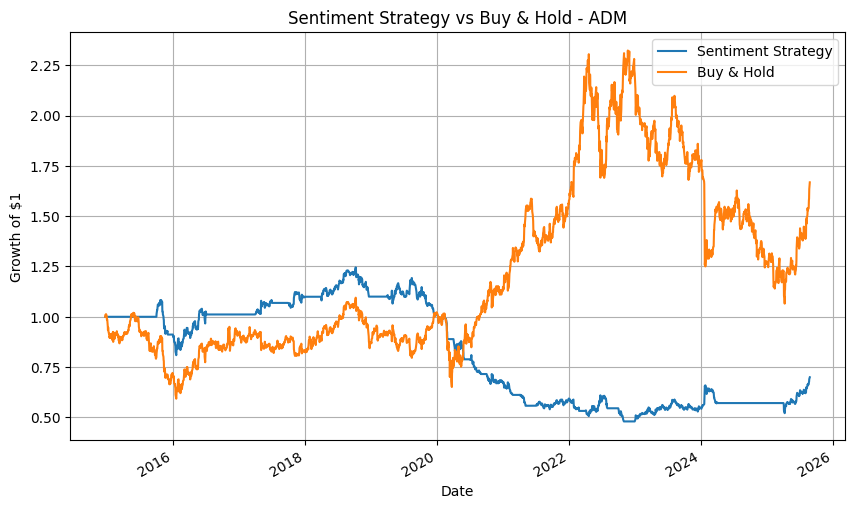

{'CAGR_strategy': np.float64(0.10919129932195859), 'Vol_annualized': np.float64(0.11149900728032755), 'Sharpe': np.float64(0.9844596444207395), 'MaxDD': np.float64(-0.1016473610301658), 'HitRate': np.float64(0.8125), 'Exposure': np.float64(0.3867362146050671)}


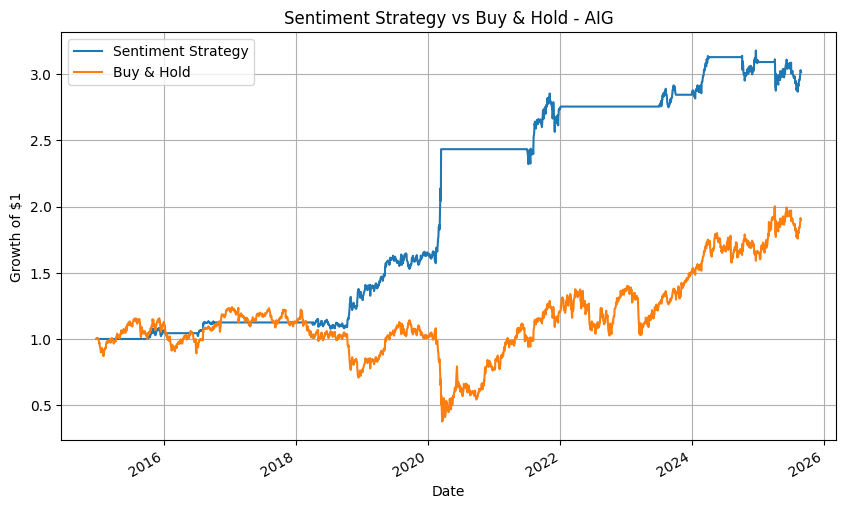

{'CAGR_strategy': np.float64(0.009063637208143405), 'Vol_annualized': np.float64(0.1301139917396329), 'Sharpe': np.float64(0.13380329783996522), 'MaxDD': np.float64(-0.36377095767300927), 'HitRate': np.float64(0.5217391304347826), 'Exposure': np.float64(0.503725782414307)}


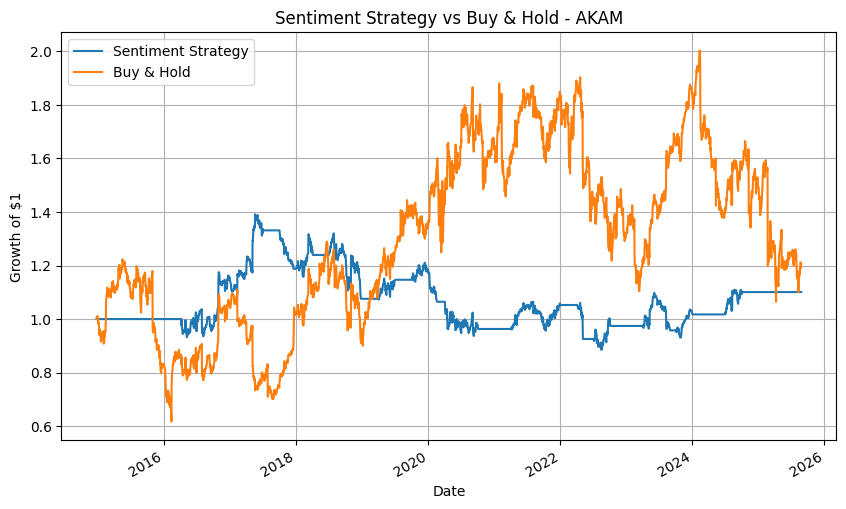

{'CAGR_strategy': np.float64(-0.007161932339878718), 'Vol_annualized': np.float64(0.11141402770296399), 'Sharpe': np.float64(-0.008920855950843182), 'MaxDD': np.float64(-0.238193671438356), 'HitRate': np.float64(0.5555555555555556), 'Exposure': np.float64(0.411698956780924)}


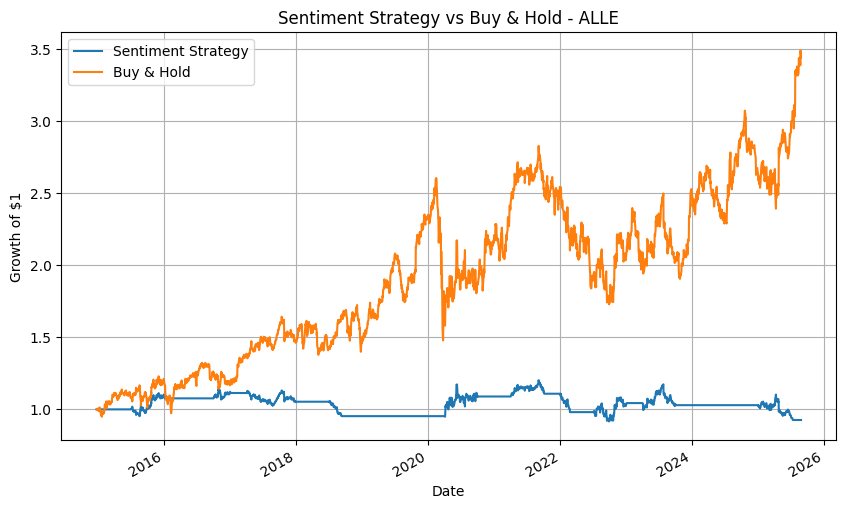

{'CAGR_strategy': np.float64(-0.06204875937522314), 'Vol_annualized': np.float64(0.09329604822021466), 'Sharpe': np.float64(-0.6397214480447397), 'MaxDD': np.float64(-0.5584749284516766), 'HitRate': np.float64(0.2777777777777778), 'Exposure': np.float64(0.38710879284649774)}


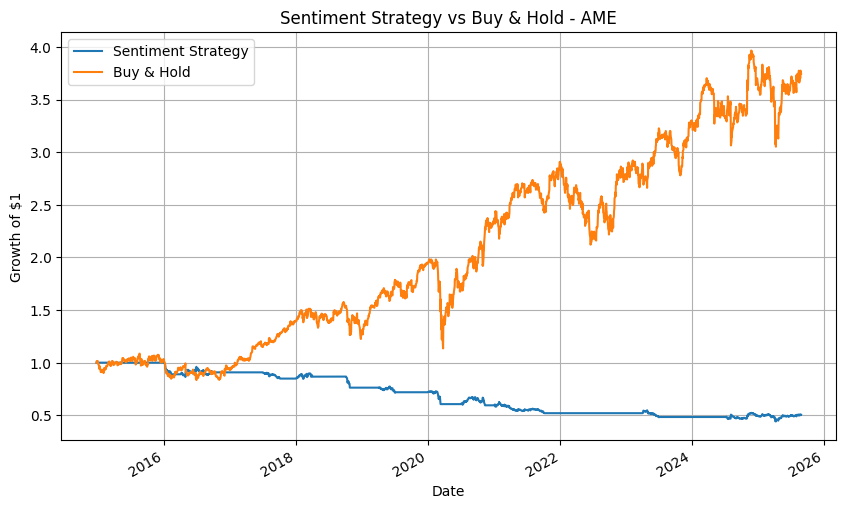

{'CAGR_strategy': np.float64(0.036737091337311734), 'Vol_annualized': np.float64(0.14880851277967988), 'Sharpe': np.float64(0.31662748241614186), 'MaxDD': np.float64(-0.2498334148453717), 'HitRate': np.float64(0.47058823529411764), 'Exposure': np.float64(0.3960506706408346)}


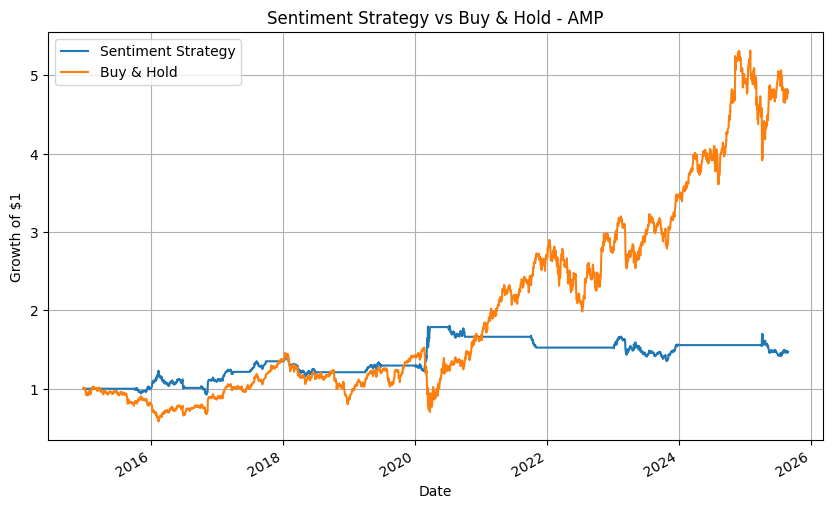

{'CAGR_strategy': np.float64(-0.03912920505797668), 'Vol_annualized': np.float64(0.12061686817674162), 'Sharpe': np.float64(-0.270589935446935), 'MaxDD': np.float64(-0.4084426746690405), 'HitRate': np.float64(0.46153846153846156), 'Exposure': np.float64(0.20268256333830104)}


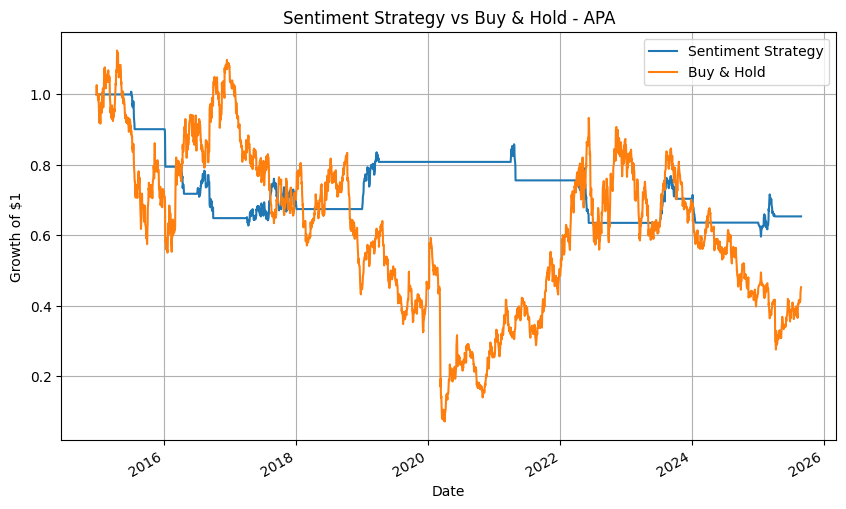

{'CAGR_strategy': np.float64(0.008974715741003614), 'Vol_annualized': np.float64(0.16585184942718625), 'Sharpe': np.float64(0.13463569520122312), 'MaxDD': np.float64(-0.4506171661251107), 'HitRate': np.float64(0.42105263157894735), 'Exposure': np.float64(0.3453800298062593)}


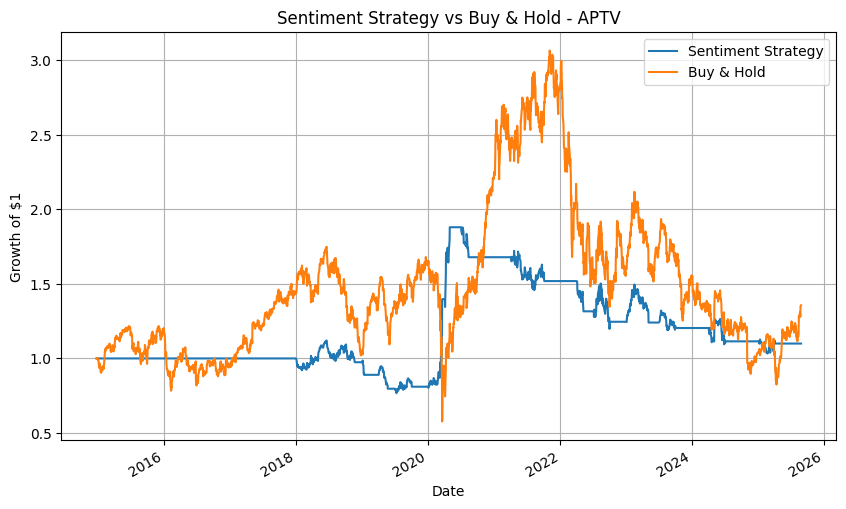

{'CAGR_strategy': np.float64(0.0005260250455618731), 'Vol_annualized': np.float64(0.09500065150583696), 'Sharpe': np.float64(0.05297203894987843), 'MaxDD': np.float64(-0.32355599404188107), 'HitRate': np.float64(0.4666666666666667), 'Exposure': np.float64(0.3621460506706408)}


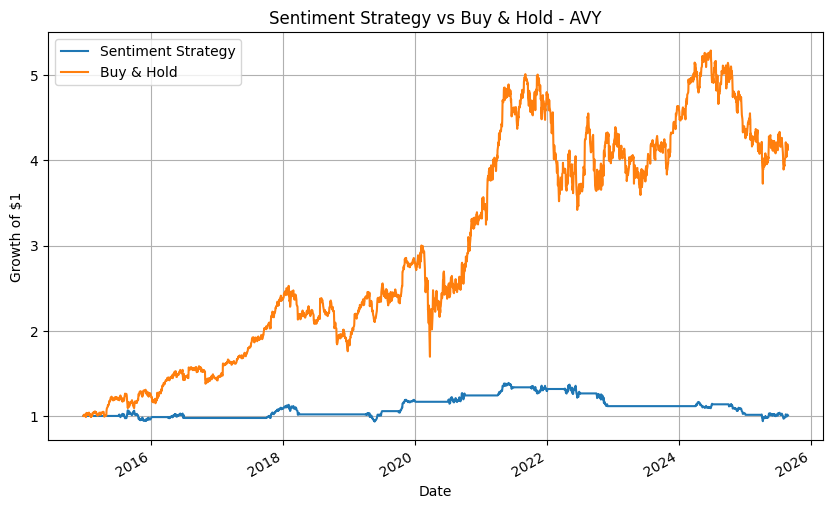

{'CAGR_strategy': np.float64(-0.0050400373184711356), 'Vol_annualized': np.float64(0.1271765295874198), 'Sharpe': np.float64(0.023229255877602065), 'MaxDD': np.float64(-0.41851745954149466), 'HitRate': np.float64(0.5), 'Exposure': np.float64(0.4027570789865872)}


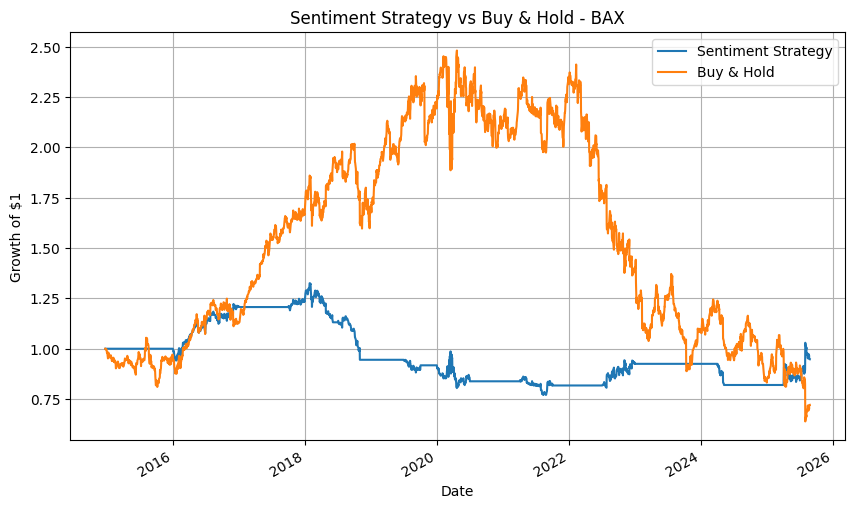

{'CAGR_strategy': np.float64(0.04717116959725498), 'Vol_annualized': np.float64(0.15552721072948056), 'Sharpe': np.float64(0.37399616718735385), 'MaxDD': np.float64(-0.3253138288388643), 'HitRate': np.float64(0.6071428571428571), 'Exposure': np.float64(0.5905365126676602)}


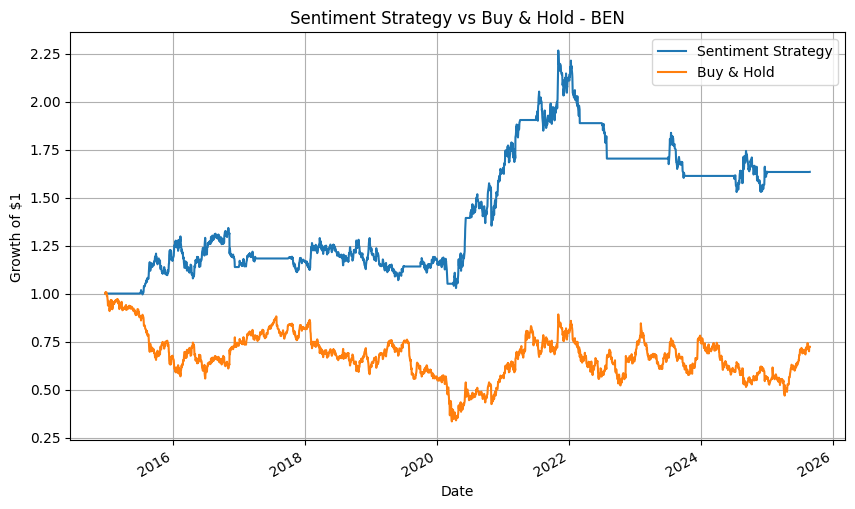

{'CAGR_strategy': np.float64(-0.011505085716120078), 'Vol_annualized': np.float64(0.05066272009087665), 'Sharpe': np.float64(-0.2030322670756255), 'MaxDD': np.float64(-0.2170388843193185), 'HitRate': np.float64(0.4), 'Exposure': np.float64(0.08867362146050671)}


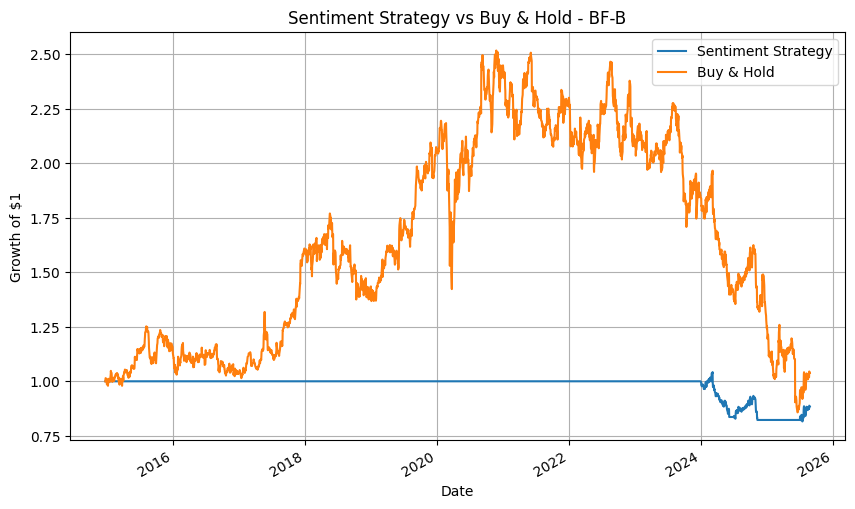

{'CAGR_strategy': np.float64(-0.0051527134605589), 'Vol_annualized': np.float64(0.13105760472841646), 'Sharpe': np.float64(0.026395064953322545), 'MaxDD': np.float64(-0.35556565871701806), 'HitRate': np.float64(0.4482758620689655), 'Exposure': np.float64(0.5640834575260805)}


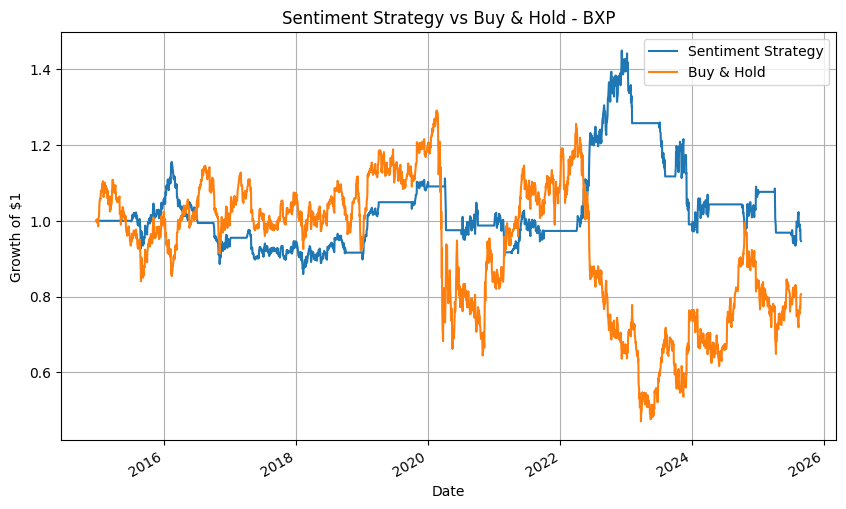

{'CAGR_strategy': np.float64(0.009322427288526614), 'Vol_annualized': np.float64(0.11432099862910951), 'Sharpe': np.float64(0.13900912919905167), 'MaxDD': np.float64(-0.3559754057485761), 'HitRate': np.float64(0.5), 'Exposure': np.float64(0.5190014903129657)}


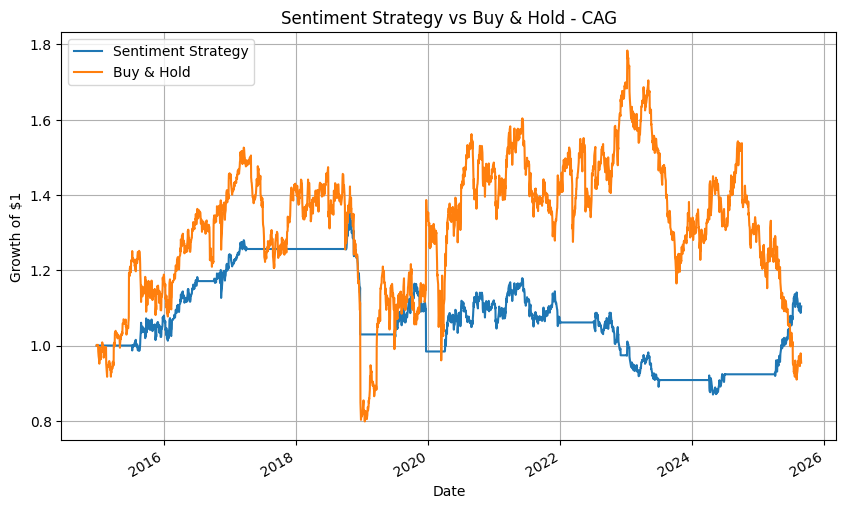

{'CAGR_strategy': np.float64(0.0023423306367624797), 'Vol_annualized': np.float64(0.10064790243415868), 'Sharpe': np.float64(0.07361811406748747), 'MaxDD': np.float64(-0.26948139374485625), 'HitRate': np.float64(0.44), 'Exposure': np.float64(0.5450819672131147)}


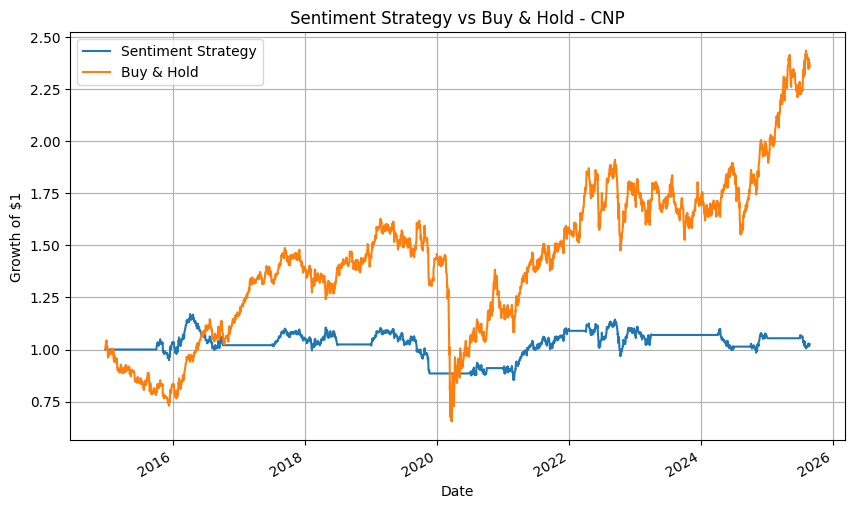

{'CAGR_strategy': np.float64(0.07722667607337419), 'Vol_annualized': np.float64(0.12987987885834051), 'Sharpe': np.float64(0.6374788899093902), 'MaxDD': np.float64(-0.16490808096344), 'HitRate': np.float64(0.7037037037037037), 'Exposure': np.float64(0.6061847988077497)}


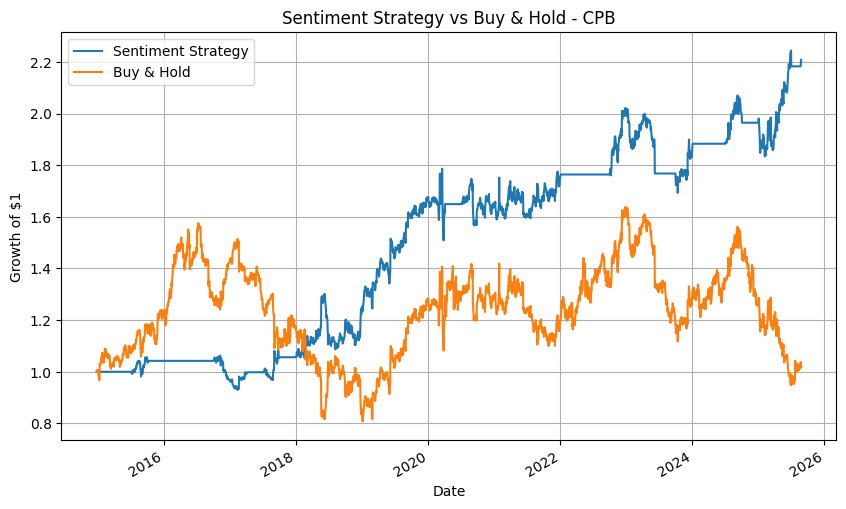

{'CAGR_strategy': np.float64(-0.013153246566167787), 'Vol_annualized': np.float64(0.16280658261405473), 'Sharpe': np.float64(-0.0005610638598668115), 'MaxDD': np.float64(-0.2647264044838381), 'HitRate': np.float64(0.5217391304347826), 'Exposure': np.float64(0.4523099850968703)}


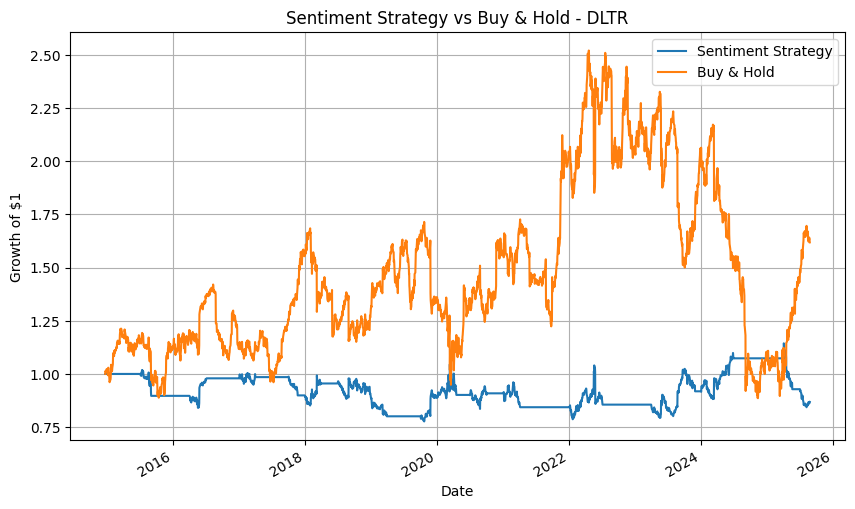

{'CAGR_strategy': np.float64(-0.04996760281652679), 'Vol_annualized': np.float64(0.11272248384988873), 'Sharpe': np.float64(-0.3983748600659078), 'MaxDD': np.float64(-0.45589232745571884), 'HitRate': np.float64(0.2727272727272727), 'Exposure': np.float64(0.4184053651266766)}


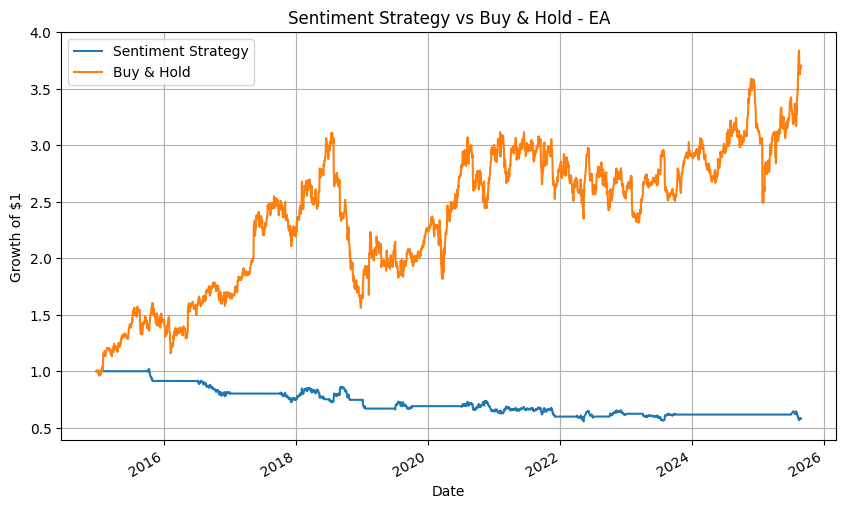

{'CAGR_strategy': np.float64(0.024537781079945198), 'Vol_annualized': np.float64(0.12634470454401922), 'Sharpe': np.float64(0.2544365998379198), 'MaxDD': np.float64(-0.30495345587560196), 'HitRate': np.float64(0.5217391304347826), 'Exposure': np.float64(0.4523099850968703)}


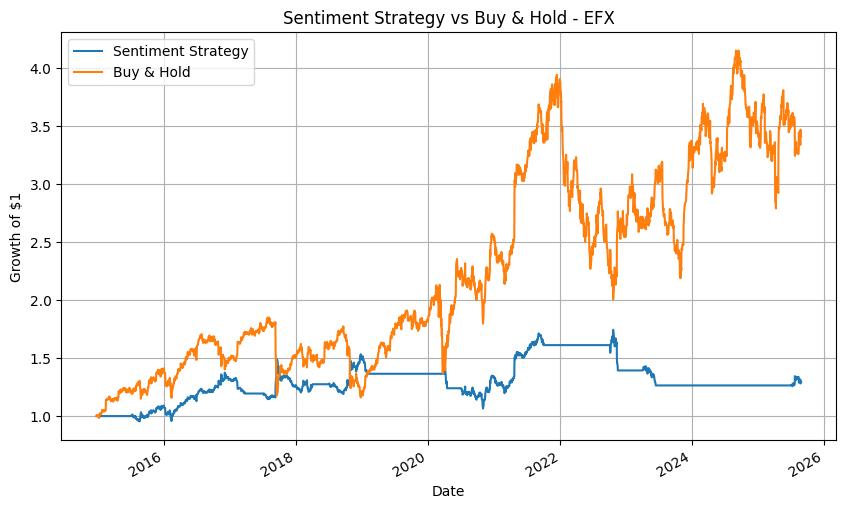

{'CAGR_strategy': np.float64(-0.04692641255161312), 'Vol_annualized': np.float64(0.16603340785780613), 'Sharpe': np.float64(-0.2072482178923355), 'MaxDD': np.float64(-0.6021293544071925), 'HitRate': np.float64(0.3076923076923077), 'Exposure': np.float64(0.4761549925484352)}


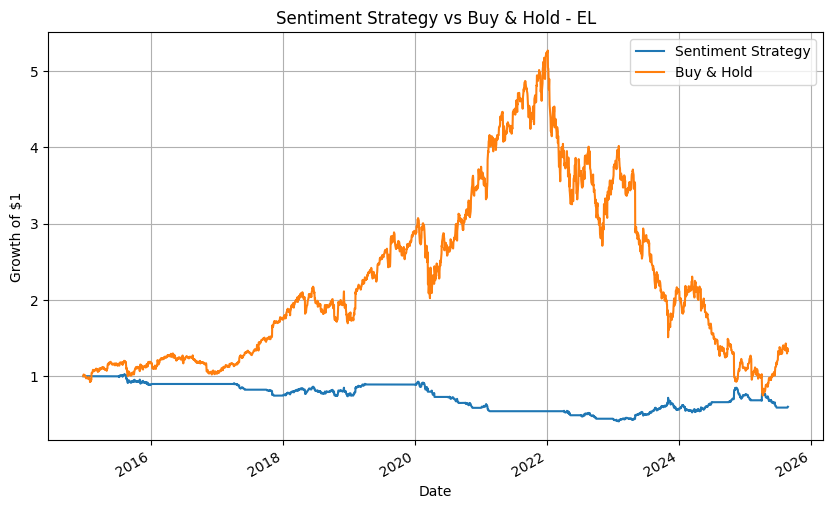

{'CAGR_strategy': np.float64(0.02833420274763676), 'Vol_annualized': np.float64(0.12424888290874812), 'Sharpe': np.float64(0.2867138816772504), 'MaxDD': np.float64(-0.23689480391294826), 'HitRate': np.float64(0.5769230769230769), 'Exposure': np.float64(0.5324143070044709)}


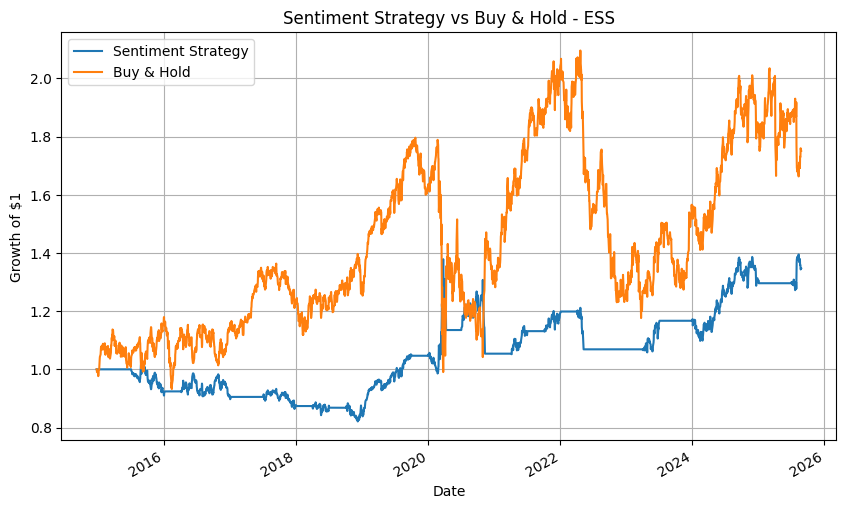

{'CAGR_strategy': np.float64(0.11087063201215241), 'Vol_annualized': np.float64(0.13015423235622597), 'Sharpe': np.float64(0.872604460819666), 'MaxDD': np.float64(-0.2213926716965693), 'HitRate': np.float64(0.6923076923076923), 'Exposure': np.float64(0.5514157973174366)}


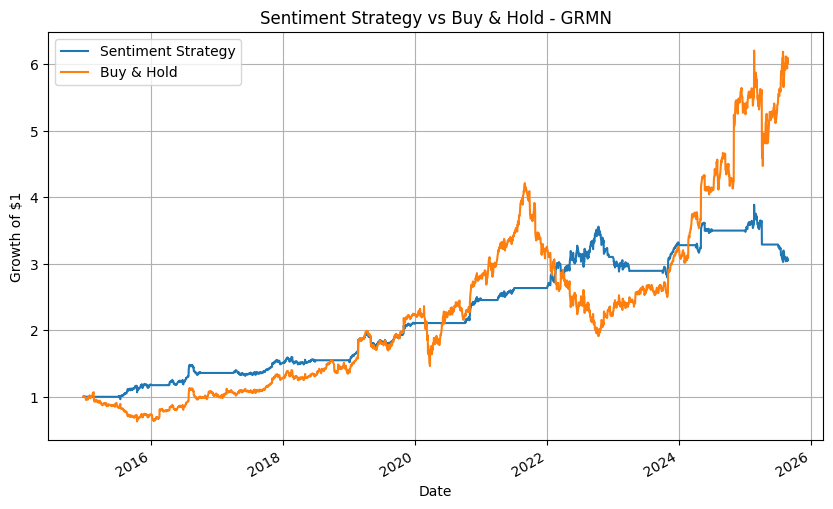

{'CAGR_strategy': np.float64(0.0967744832182229), 'Vol_annualized': np.float64(0.20187997381152653), 'Sharpe': np.float64(0.5565942106603727), 'MaxDD': np.float64(-0.31696517338156194), 'HitRate': np.float64(0.5357142857142857), 'Exposure': np.float64(0.5584947839046199)}


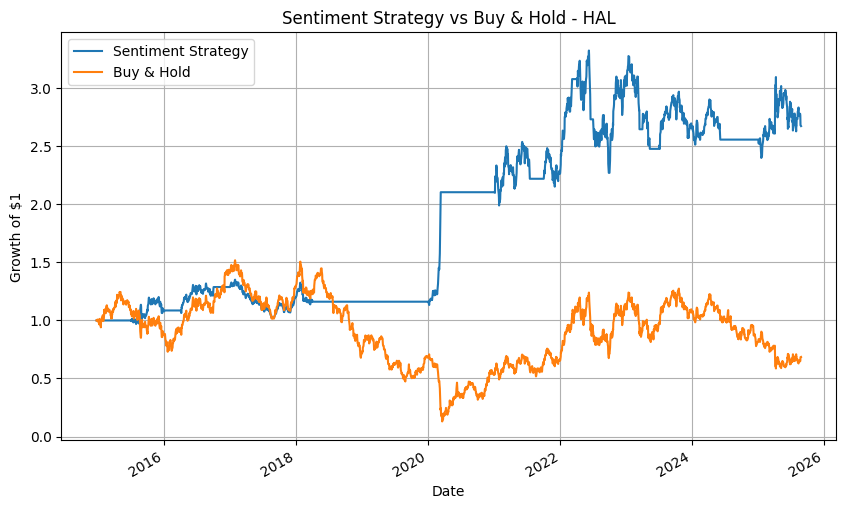

{'CAGR_strategy': np.float64(-0.02360561368379266), 'Vol_annualized': np.float64(0.14152727914862945), 'Sharpe': np.float64(-0.09716037279971469), 'MaxDD': np.float64(-0.46984101111203114), 'HitRate': np.float64(0.5), 'Exposure': np.float64(0.5141579731743666)}


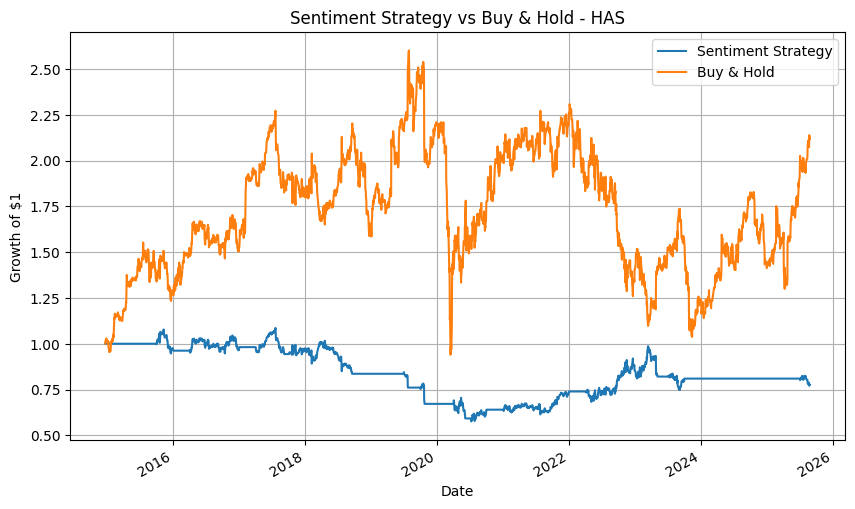

{'CAGR_strategy': np.float64(0.010184658544649672), 'Vol_annualized': np.float64(0.09788680787424435), 'Sharpe': np.float64(0.15274819331310902), 'MaxDD': np.float64(-0.187226348841813), 'HitRate': np.float64(0.631578947368421), 'Exposure': np.float64(0.4157973174366617)}


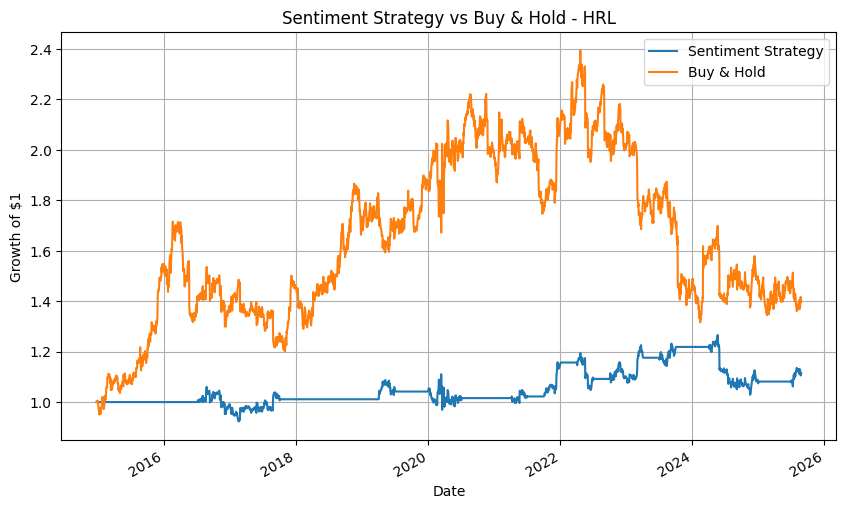

{'CAGR_strategy': np.float64(-0.02923136520408698), 'Vol_annualized': np.float64(0.10926364805197691), 'Sharpe': np.float64(-0.21676757113933953), 'MaxDD': np.float64(-0.43871291532177936), 'HitRate': np.float64(0.47368421052631576), 'Exposure': np.float64(0.37183308494783907)}


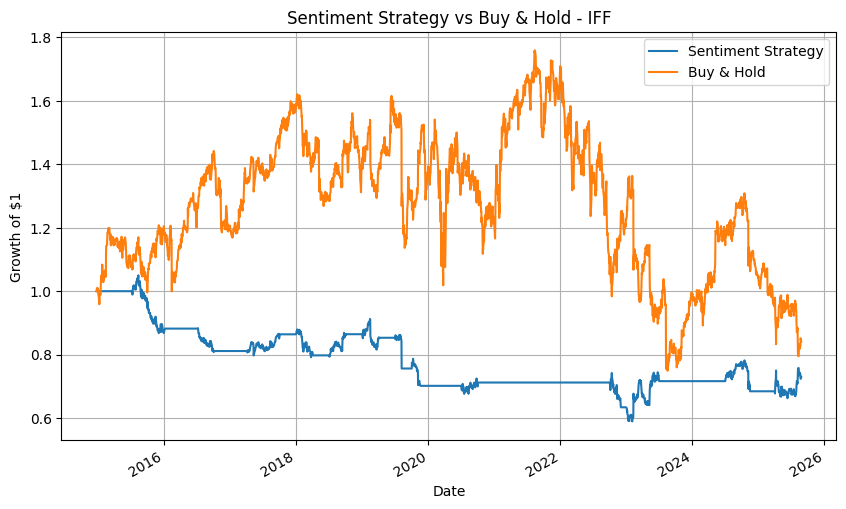

{'CAGR_strategy': np.float64(0.022658325221191378), 'Vol_annualized': np.float64(0.14423167782060553), 'Sharpe': np.float64(0.22702420046751137), 'MaxDD': np.float64(-0.2896463196683382), 'HitRate': np.float64(0.5652173913043478), 'Exposure': np.float64(0.45603576751117736)}


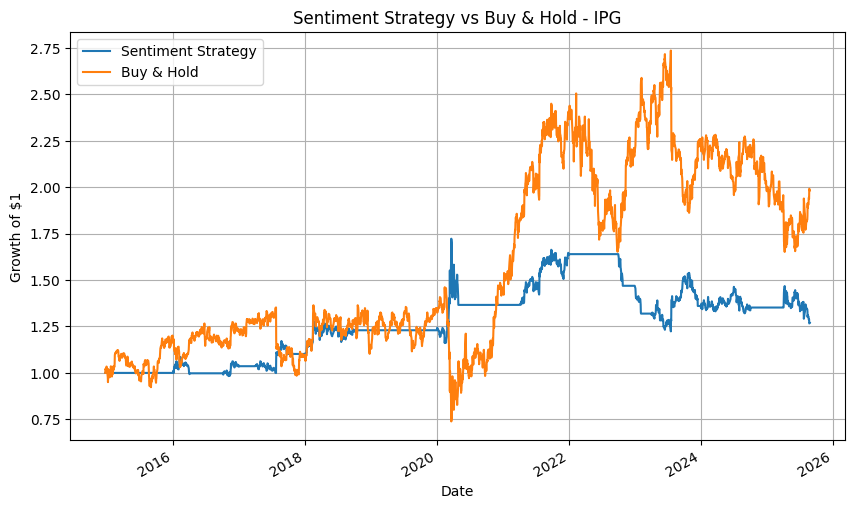

{'CAGR_strategy': np.float64(0.02448115872551515), 'Vol_annualized': np.float64(0.12521421581811026), 'Sharpe': np.float64(0.2544595614489249), 'MaxDD': np.float64(-0.25592044474429887), 'HitRate': np.float64(0.5185185185185185), 'Exposure': np.float64(0.589418777943368)}


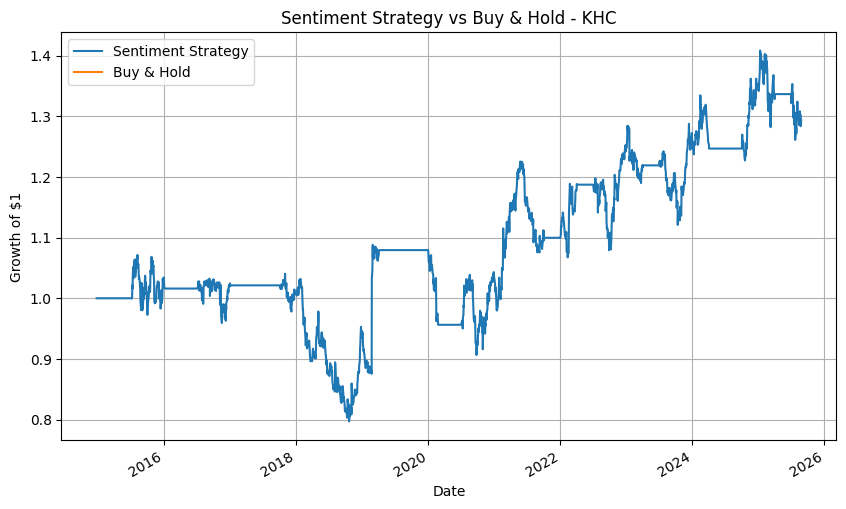

{'CAGR_strategy': np.float64(0.04015424197555362), 'Vol_annualized': np.float64(0.14977042751324748), 'Sharpe': np.float64(0.33941324527344346), 'MaxDD': np.float64(-0.25906500155061907), 'HitRate': np.float64(0.5652173913043478), 'Exposure': np.float64(0.46162444113263784)}


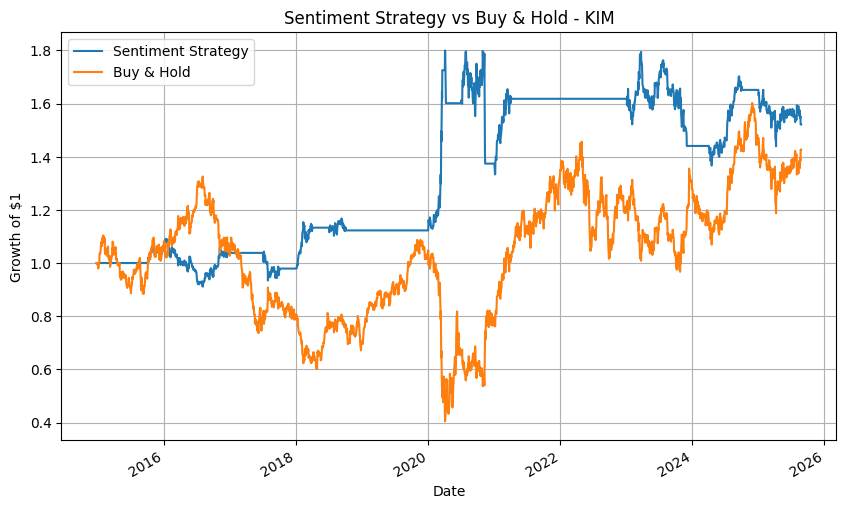

{'CAGR_strategy': np.float64(0.002815188049238637), 'Vol_annualized': np.float64(0.12526686839584722), 'Sharpe': np.float64(0.08500076694976035), 'MaxDD': np.float64(-0.33922306290733195), 'HitRate': np.float64(0.5833333333333334), 'Exposure': np.float64(0.4966467958271237)}


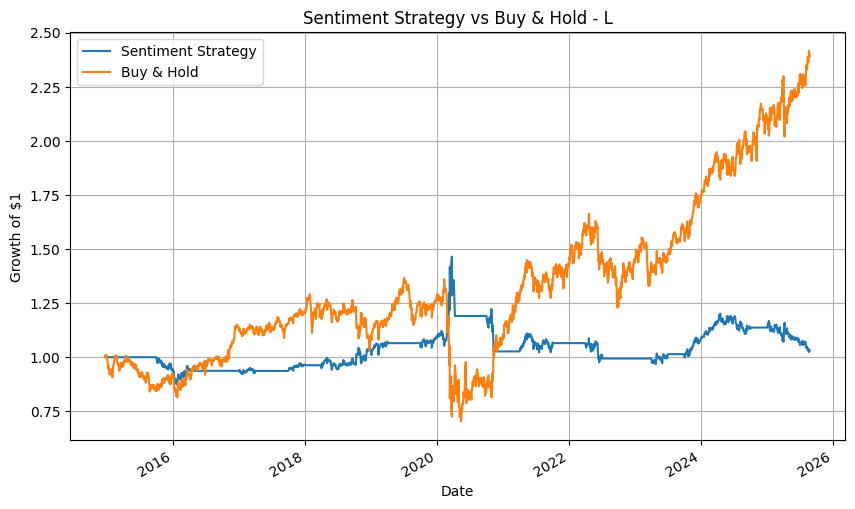

{'CAGR_strategy': np.float64(-0.01563252190303377), 'Vol_annualized': np.float64(0.15596712223643486), 'Sharpe': np.float64(-0.02265309446079424), 'MaxDD': np.float64(-0.5705940015585882), 'HitRate': np.float64(0.3793103448275862), 'Exposure': np.float64(0.5301788375558867)}


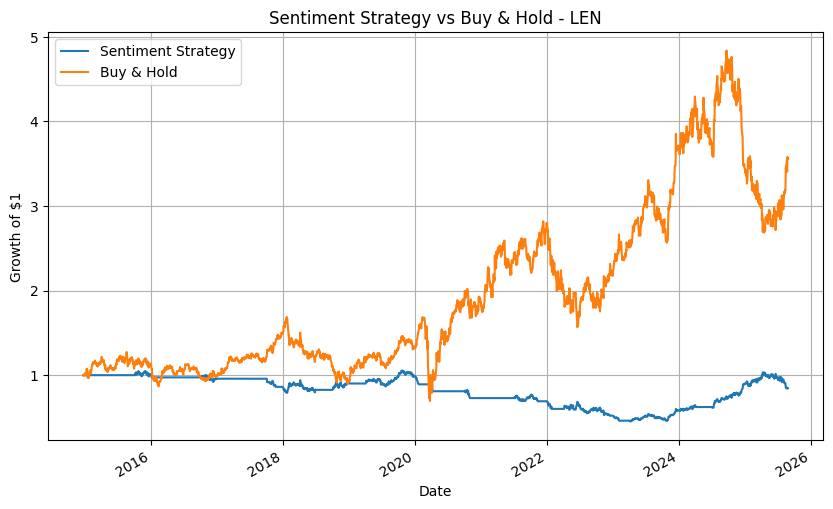

{'CAGR_strategy': np.float64(0.0026826055620701172), 'Vol_annualized': np.float64(0.14792668003788542), 'Sharpe': np.float64(0.09152622486981737), 'MaxDD': np.float64(-0.32503415089990795), 'HitRate': np.float64(0.45454545454545453), 'Exposure': np.float64(0.4243666169895678)}


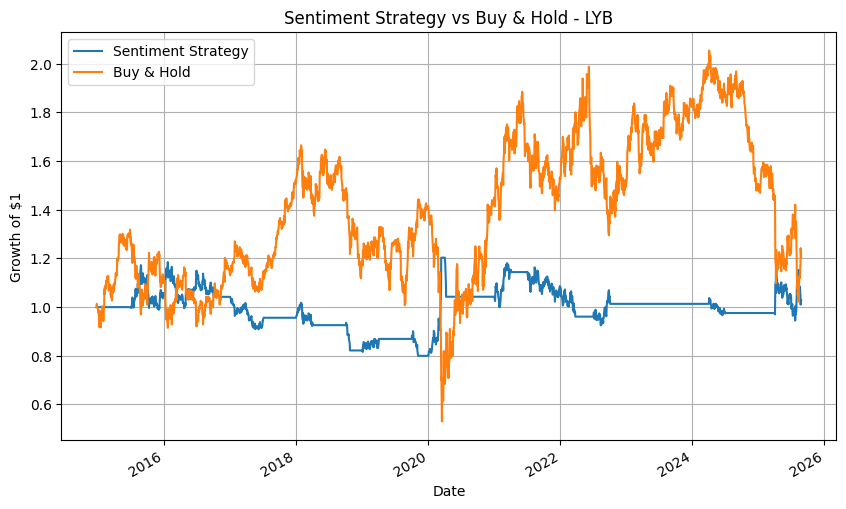

{'CAGR_strategy': np.float64(-0.012851886392200473), 'Vol_annualized': np.float64(0.11552017910639946), 'Sharpe': np.float64(-0.05436302646097886), 'MaxDD': np.float64(-0.24589129082805206), 'HitRate': np.float64(0.42857142857142855), 'Exposure': np.float64(0.45491803278688525)}


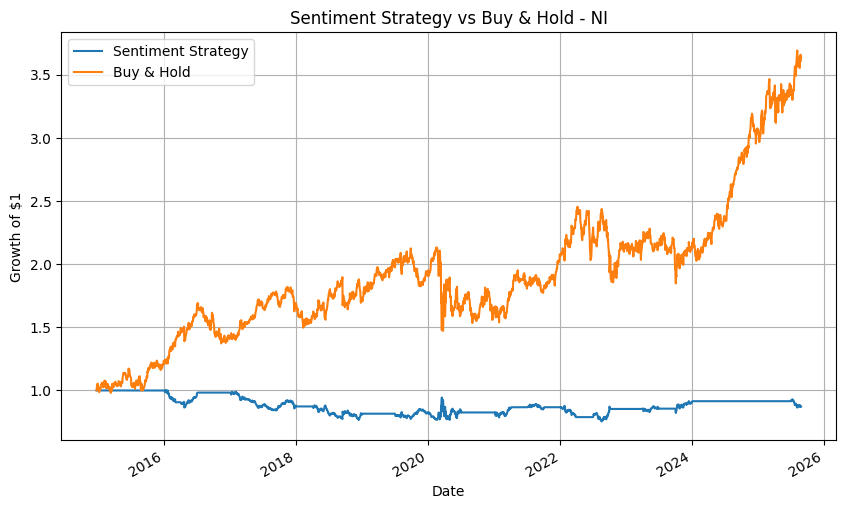

{'CAGR_strategy': np.float64(-0.014210979110778288), 'Vol_annualized': np.float64(0.14001824531405035), 'Sharpe': np.float64(-0.031888498475846315), 'MaxDD': np.float64(-0.4981977560690165), 'HitRate': np.float64(0.4782608695652174), 'Exposure': np.float64(0.4355439642324888)}


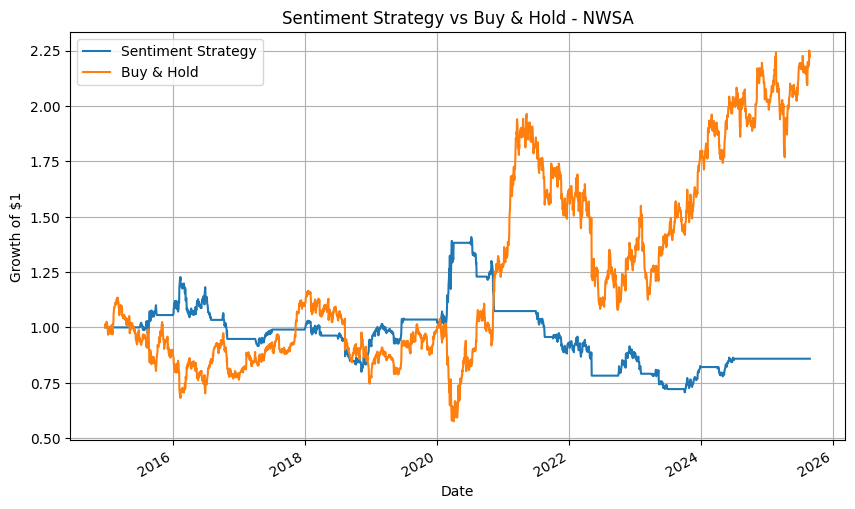

{'CAGR_strategy': np.float64(0.09847838206023085), 'Vol_annualized': np.float64(0.16827375886399568), 'Sharpe': np.float64(0.6359969189236735), 'MaxDD': np.float64(-0.21832343304796897), 'HitRate': np.float64(0.5), 'Exposure': np.float64(0.37555886736214605)}


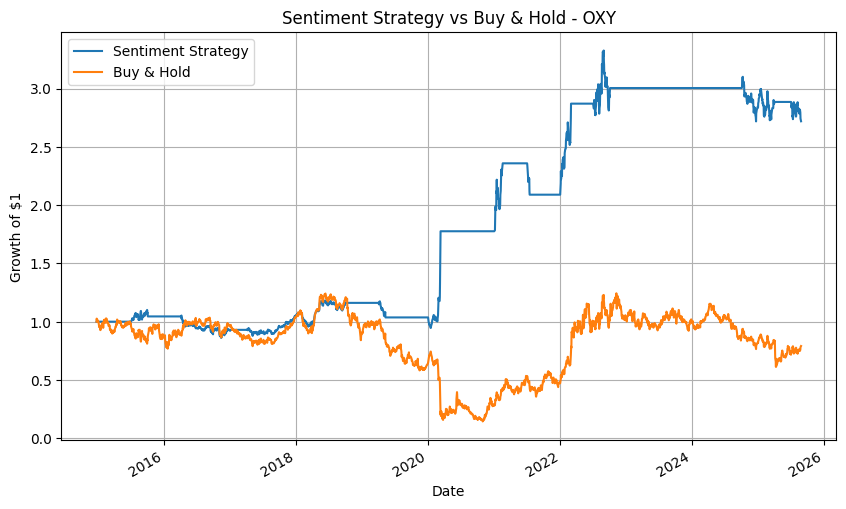

{'CAGR_strategy': np.float64(-0.03205590684843296), 'Vol_annualized': np.float64(0.14024219280414216), 'Sharpe': np.float64(-0.16178825475783884), 'MaxDD': np.float64(-0.33265710899088374), 'HitRate': np.float64(0.5), 'Exposure': np.float64(0.44821162444113266)}


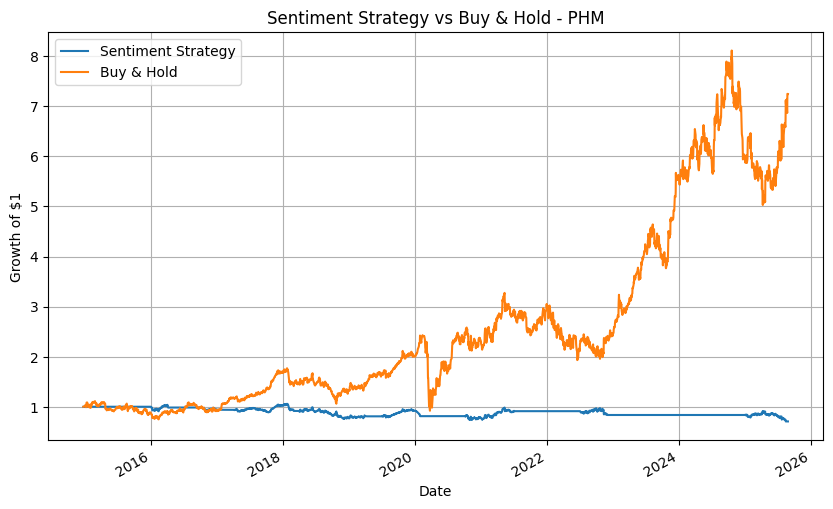

{'CAGR_strategy': np.float64(-0.05269912702726853), 'Vol_annualized': np.float64(0.09808764261608371), 'Sharpe': np.float64(-0.502700288383277), 'MaxDD': np.float64(-0.4747246562737891), 'HitRate': np.float64(0.24), 'Exposure': np.float64(0.5350223546944859)}


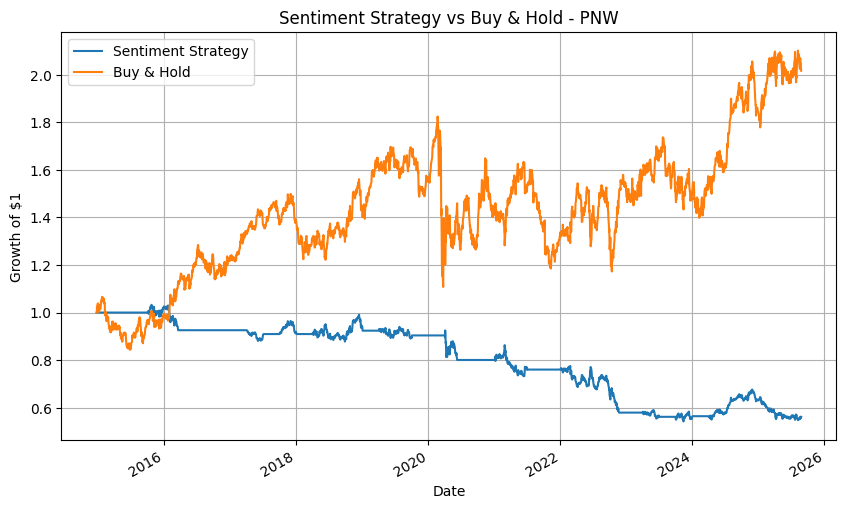

{'CAGR_strategy': np.float64(0.052745180001263936), 'Vol_annualized': np.float64(0.10039462965547616), 'Sharpe': np.float64(0.5619132779800604), 'MaxDD': np.float64(-0.18927199140995477), 'HitRate': np.float64(0.6428571428571429), 'Exposure': np.float64(0.29843517138599107)}


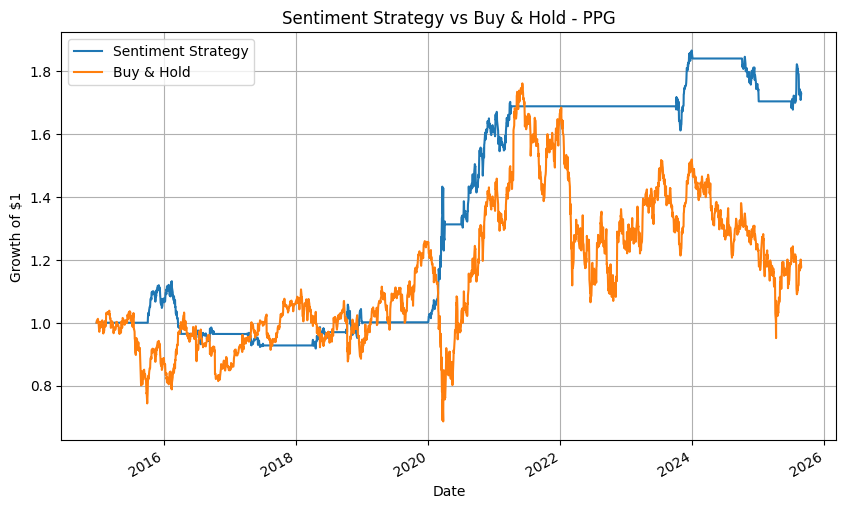

{'CAGR_strategy': np.float64(0.05593273250294373), 'Vol_annualized': np.float64(0.20347818305324566), 'Sharpe': np.float64(0.37069880196111216), 'MaxDD': np.float64(-0.36804533695525665), 'HitRate': np.float64(0.5), 'Exposure': np.float64(0.5421013412816692)}


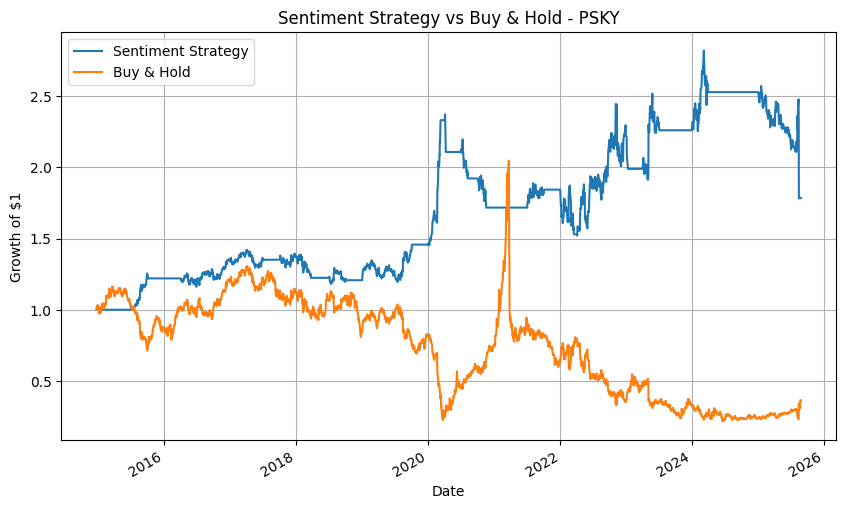

{'CAGR_strategy': np.float64(0.05381309389527256), 'Vol_annualized': np.float64(0.14820835056296383), 'Sharpe': np.float64(0.42724188029365123), 'MaxDD': np.float64(-0.25479765588909054), 'HitRate': np.float64(0.5), 'Exposure': np.float64(0.46609538002980627)}


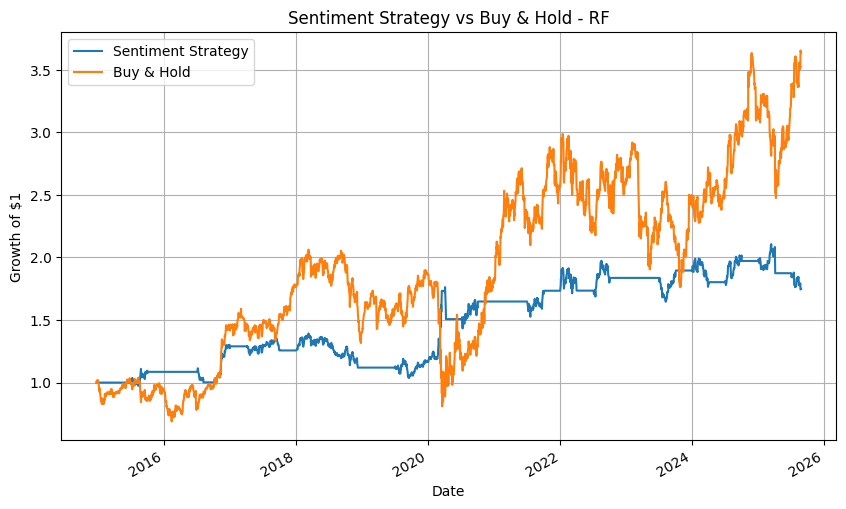

{'CAGR_strategy': np.float64(0.0598777719438528), 'Vol_annualized': np.float64(0.11515162720584515), 'Sharpe': np.float64(0.5623727975452285), 'MaxDD': np.float64(-0.194153369430774), 'HitRate': np.float64(0.7), 'Exposure': np.float64(0.43107302533532044)}


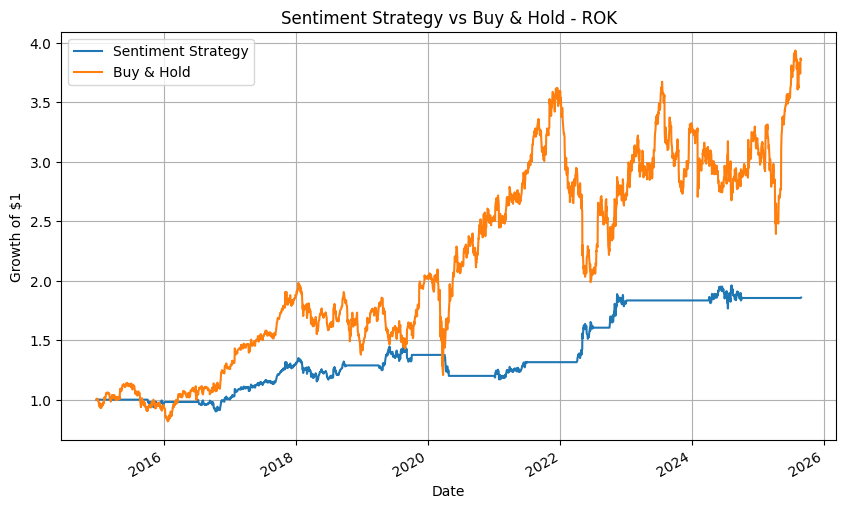

{'CAGR_strategy': np.float64(-0.06991862905477131), 'Vol_annualized': np.float64(0.1758377637147802), 'Sharpe': np.float64(-0.32334449085745304), 'MaxDD': np.float64(-0.7021273863840152), 'HitRate': np.float64(0.4230769230769231), 'Exposure': np.float64(0.44672131147540983)}


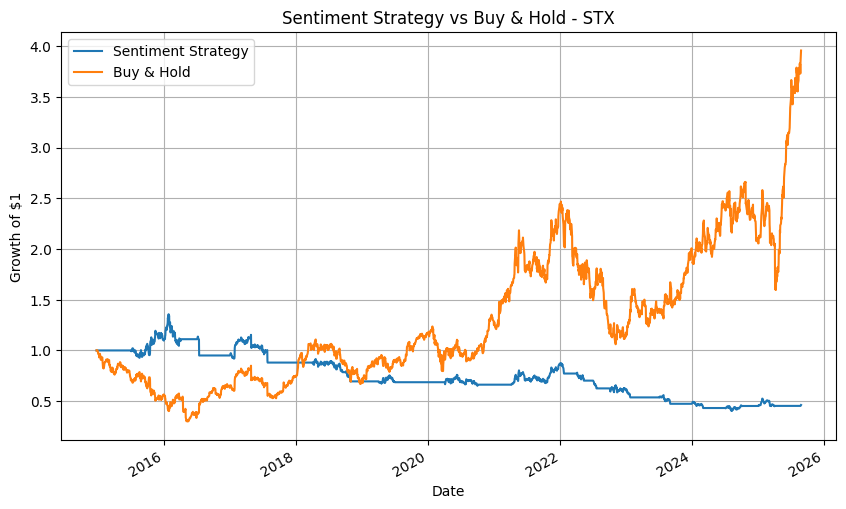

{'CAGR_strategy': np.float64(0.05822517467772226), 'Vol_annualized': np.float64(0.15491171413693905), 'Sharpe': np.float64(0.44275778912874797), 'MaxDD': np.float64(-0.26306495509589), 'HitRate': np.float64(0.6206896551724138), 'Exposure': np.float64(0.577123695976155)}


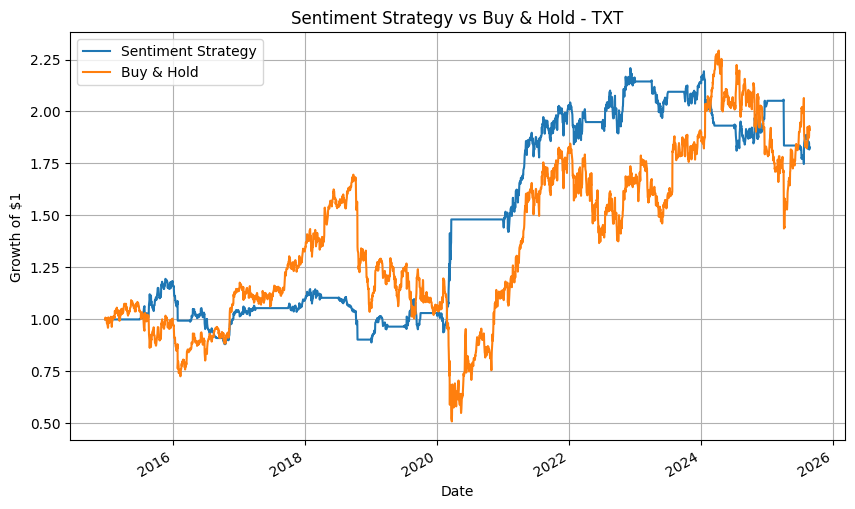

{'CAGR_strategy': np.float64(0.015102126390886372), 'Vol_annualized': np.float64(0.14104231750296659), 'Sharpe': np.float64(0.1767411882026832), 'MaxDD': np.float64(-0.32374081876213856), 'HitRate': np.float64(0.5454545454545454), 'Exposure': np.float64(0.4612518628912072)}


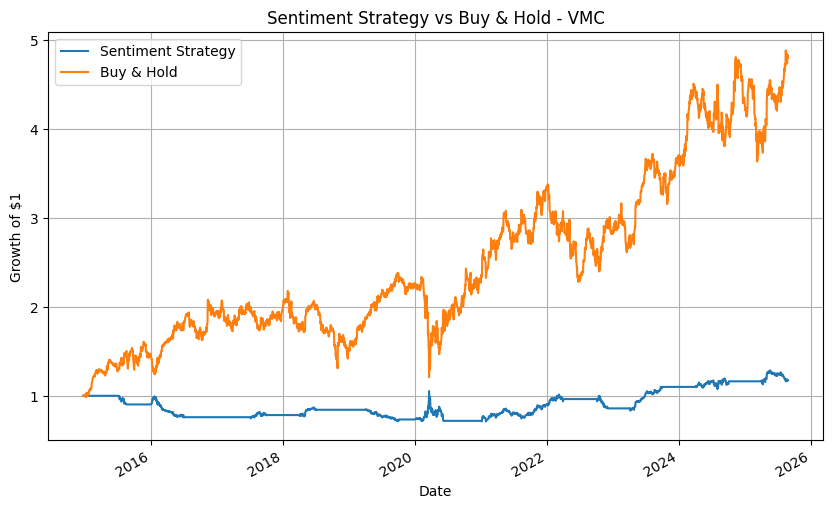

{'CAGR_strategy': np.float64(-0.013968656857254791), 'Vol_annualized': np.float64(0.11538440238572695), 'Sharpe': np.float64(-0.06407721753873116), 'MaxDD': np.float64(-0.33353176103555104), 'HitRate': np.float64(0.4782608695652174), 'Exposure': np.float64(0.48062593144560356)}


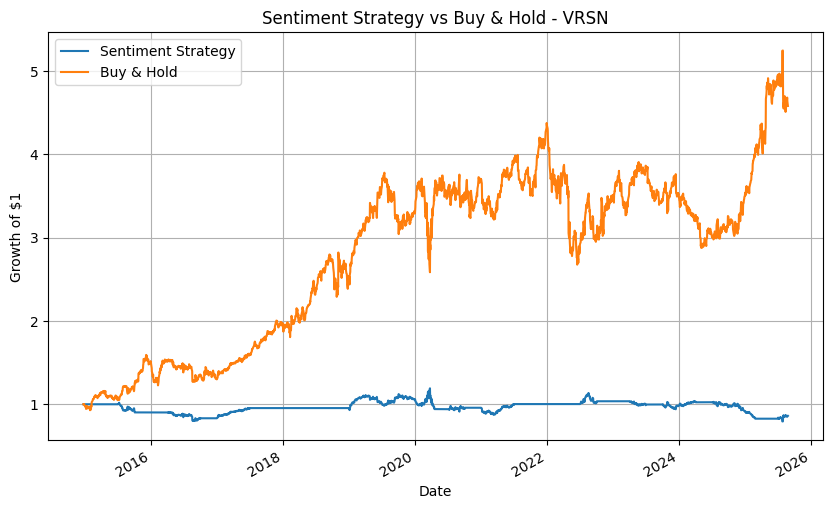

{'CAGR_strategy': np.float64(0.033572608683575034), 'Vol_annualized': np.float64(0.1311799653263532), 'Sharpe': np.float64(0.3157279194195616), 'MaxDD': np.float64(-0.33323968106925006), 'HitRate': np.float64(0.4090909090909091), 'Exposure': np.float64(0.44187779433681074)}


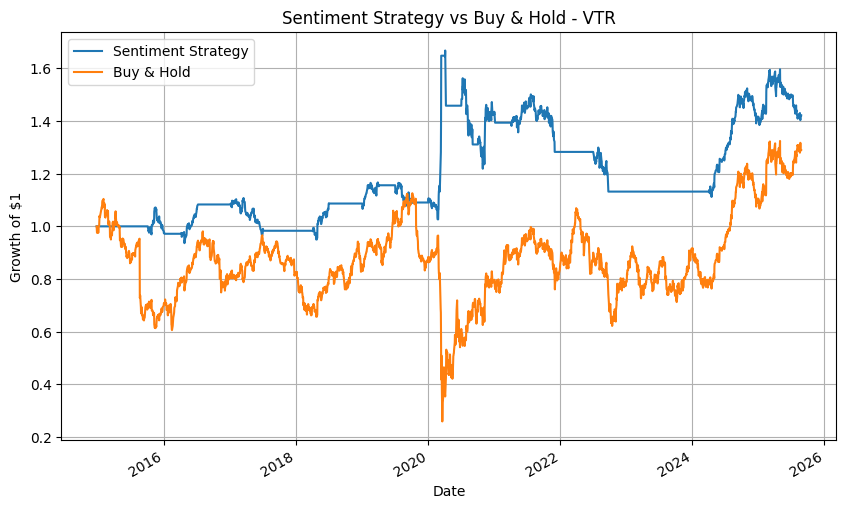

{'CAGR_strategy': np.float64(0.005853919081699965), 'Vol_annualized': np.float64(0.14369119312208672), 'Sharpe': np.float64(0.11207816023826656), 'MaxDD': np.float64(-0.26988553298060913), 'HitRate': np.float64(0.43478260869565216), 'Exposure': np.float64(0.4277198211624441)}


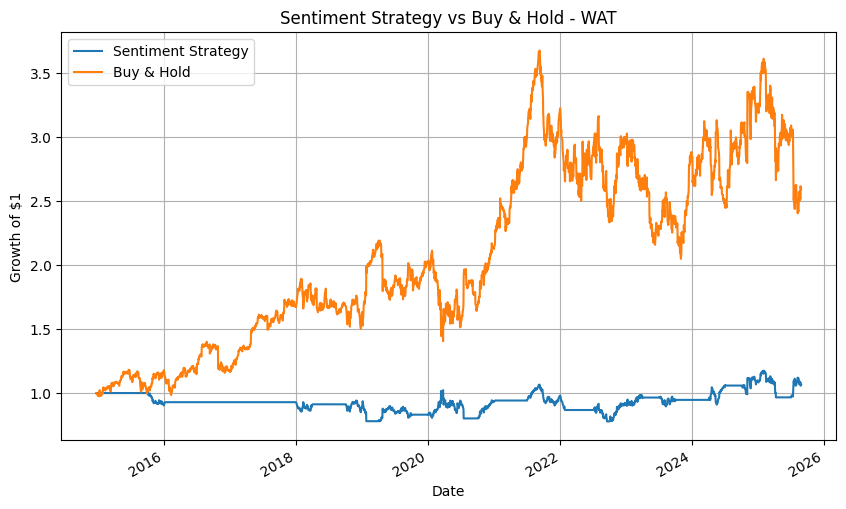

{'CAGR_strategy': np.float64(-0.0919858643826913), 'Vol_annualized': np.float64(0.16238594076966714), 'Sharpe': np.float64(-0.5125505104804686), 'MaxDD': np.float64(-0.7175021560180229), 'HitRate': np.float64(0.2608695652173913), 'Exposure': np.float64(0.38934426229508196)}


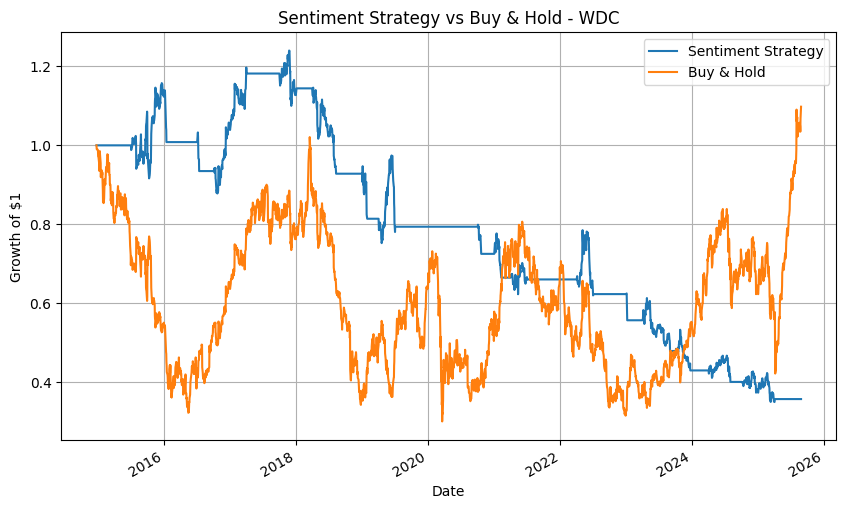

{'CAGR_strategy': np.float64(-0.026219702801399847), 'Vol_annualized': np.float64(0.0850662839719463), 'Sharpe': np.float64(-0.26971984154645484), 'MaxDD': np.float64(-0.32590339395533263), 'HitRate': np.float64(0.2727272727272727), 'Exposure': np.float64(0.470193740685544)}


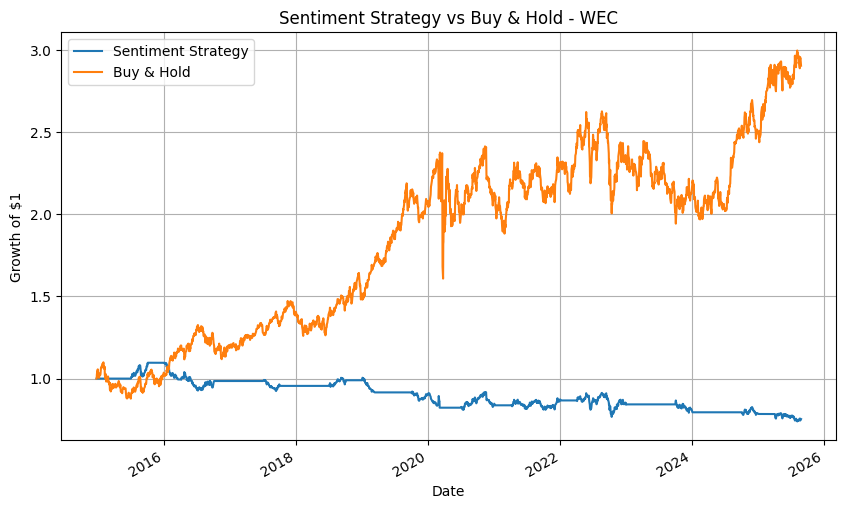

{'CAGR_strategy': np.float64(0.06212474366268195), 'Vol_annualized': np.float64(0.15025168253402568), 'Sharpe': np.float64(0.4757440823893518), 'MaxDD': np.float64(-0.24173687779972886), 'HitRate': np.float64(0.5714285714285714), 'Exposure': np.float64(0.522354694485842)}


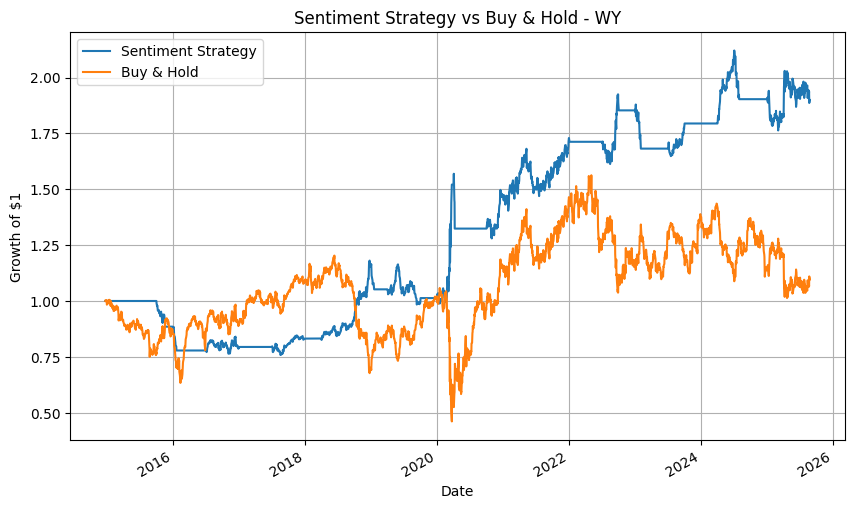

In [42]:
for ticker in earnings_call_df.ticker.unique():
    # Sort events chronologically
    ec = earnings_call_df[earnings_call_df.ticker == ticker].sort_values('date').copy()
    
    # Expanding mean/std up to (but not including) current row (no look-ahead)
    ec['mu']  = ec['overall_sentiment'].shift().expanding().mean()
    ec['sig'] = ec['overall_sentiment'].shift().expanding().std()
    ec['z_overall'] = (ec['overall_sentiment'] - ec['mu']) / (ec['sig'] + 1e-12)
    
    # Signal from overall sentiment z-score
    upper, lower = 0.75, -0.75  # try 0.5–1.5 in sweeps
    ec['signal'] = 0
    ec.loc[ec['z_overall'] >= upper, 'signal'] = 1
    ec.loc[ec['z_overall'] <= lower, 'signal'] = -1
    
    # Map each call date to the NEXT trading day as entry_date
    px = price_df[ticker]
    trading_index = px.index
    
    def next_trading_day(d):
        # if d is a trading day, enter next session; else bfill to next session
        if d in trading_index:
            i = trading_index.get_loc(d)
            return trading_index[min(i + 1, len(trading_index) - 1)]
        else:
            i = trading_index.get_indexer([d], method='bfill')[0]
            return trading_index[i]
    
    ec['entry_date'] = ec['date'].apply(next_trading_day)
    
    
    # --- Build positions with hold-until-next-earnings + stops -------------------
    pos = pd.Series(0.0, index=trading_index)
    trade_entries, trade_exits, trade_pnls = [], [], []
    
    rets = px.pct_change().fillna(0.0)
    ec_sorted = ec.dropna(subset=['entry_date']).sort_values('entry_date')
    
    for _, row in ec_sorted.iterrows():
        sig = row['signal']
        if sig == 0:
            continue
    
        entry = row['entry_date']
        # Default planned exit is next earnings entry_date (or last day)
        nxt  = ec_sorted.loc[ec_sorted['entry_date'] > entry, 'entry_date'].min()
        last = trading_index[-1]
        exit_plan = nxt if pd.notna(nxt) else last
    
        # Align to trading calendar (defensive)
        if entry not in trading_index:
            entry = trading_index[trading_index.get_indexer([entry], method='bfill')[0]]
        if exit_plan not in trading_index:
            exit_plan = trading_index[trading_index.get_indexer([exit_plan], method='bfill')[0]]
    
        entry_price = px.loc[entry]
        best_fav = 0.0
        actual_exit = exit_plan
    
        # Walk from entry to planned exit (inclusive), applying risk exits
        window = pos.loc[entry:exit_plan].index
        for d in window:
            pnl = sig * (px.loc[d] / entry_price - 1.0)  # sign-adjusted PnL
            if pnl > best_fav:
                best_fav = pnl
    
            stopped = False
            if pnl <= -STOP_LOSS:
                actual_exit = d; stopped = True
            elif pnl >= TAKE_PROFIT:
                actual_exit = d; stopped = True
            elif USE_TRAILING and best_fav > 0 and (best_fav - pnl) >= TRAIL_GIVEUP:
                actual_exit = d; stopped = True
    
            pos.loc[d] = sig * POSITION_SIZE
            if stopped:
                break
    
        # Flat after actual_exit until planned exit
        start = trading_index.get_loc(actual_exit)
        end   = trading_index.get_loc(exit_plan)
        if isinstance(start, slice): start = start.start
        if isinstance(end, slice):   end   = end.stop - 1
        if start + 1 <= end:
            after = trading_index[start + 1 : end + 1]
            pos.loc[after] = 0.0
    
        # Record trade
        trade_entries.append(entry)
        trade_exits.append(actual_exit)
        trade_pnls.append(sig * (px.loc[actual_exit] / entry_price - 1.0))
    
    # --- Returns, costs, curves, stats ------------------------------------------
    # Daily strategy returns (close-to-close, position held through day)
    strategy_daily = (pos * rets).fillna(0.0)
    
    # Apply trading costs only on actual entries & exits
    commission_bp = 2
    per_side_cost = commission_bp / 10000.0
    cost_series = pd.Series(0.0, index=rets.index)
    for d in trade_entries: cost_series.loc[d] -= per_side_cost
    for d in trade_exits:  cost_series.loc[d] -= per_side_cost
    
    strategy_daily_net = (strategy_daily + cost_series).astype(float)
    
    # Curves
    strategy_curve_net = (1 + strategy_daily_net).cumprod().rename("Sentiment Strategy")
    bh_curve = (px / px.iloc[0]).rename("Buy & Hold")
    
    # Metrics
    def max_drawdown(curve):
        peak = curve.cummax()
        return (curve / peak - 1).min()
    
    def sharpe(daily_ret, rf=0.0, periods=252):
        excess = daily_ret - rf/periods
        return np.sqrt(periods) * excess.mean() / (excess.std(ddof=1) + 1e-12)
    
    sr = strategy_daily_net
    days_in = (pos != 0)
    
    stats = {
        "CAGR_strategy": strategy_curve_net.iloc[-1]**(252/len(sr)) - 1,
        "Vol_annualized": sr.std(ddof=1) * np.sqrt(252),
        "Sharpe": sharpe(sr),
        "MaxDD": max_drawdown(strategy_curve_net),
        "HitRate": (pd.Series(trade_pnls) > 0).mean() if trade_pnls else np.nan,
        "Exposure": days_in.mean()
    }
    print(stats)
    
    # Plot
    plot_df = pd.concat([strategy_curve_net, bh_curve], axis=1)
    ax = plot_df.plot(title=f"Sentiment Strategy vs Buy & Hold - {ticker}", figsize=(10,6))
    ax.set_ylabel("Growth of $1")
    ax.grid(True)
    plt.show()


In [43]:
import pandas as pd, yfinance as yf

tickers = sorted(earnings_call_df.ticker.astype(str).str.strip().str.upper().unique())
start = earnings_call_df['date'].min() - pd.Timedelta(days=10)
end   = earnings_call_df['date'].max() + pd.Timedelta(days=10)

px_all = yf.download(tickers, start=start, end=end, progress=False, auto_adjust=False, repair=True, threads=True)

# Normalize to Close-only with tickers as columns
if isinstance(px_all.columns, pd.MultiIndex):
    close = px_all['Close'].copy()
else:
    close = px_all[['Close']].copy()
    close.columns = tickers if len(tickers) == 1 else close.columns

def first_price_date(s):
    s = s.dropna()
    return s.index.min() if not s.empty else pd.NaT

gaps = []
for t in tickers:
    s = close.get(t)
    if s is None:
        gaps.append((t, "NO COLUMN RETURNED"))
        continue
    fdate = first_price_date(s)
    edates = earnings_call_df.loc[earnings_call_df.ticker.str.upper()==t, 'date'].sort_values()
    mind = edates.min() if not edates.empty else pd.NaT
    gaps.append((t, f"first_px={fdate}", f"first_ec={mind}", f"earliest_needed={mind - pd.Timedelta(days=1) if pd.notna(mind) else pd.NaT}"))
pd.DataFrame(gaps, columns=["ticker","first_px","first_ec","earliest_needed"]).sort_values("first_px")


ticker                      first_px                      first_ec  \
0     ADM  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
26    IPG  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
28    KIM  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
29      L  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
30    LEN  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
31    LYB  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
32     NI  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
33   NWSA  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
34    OXY  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
35    PHM  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
36    PNW  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
37    PPG  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
38   PSKY  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
39     RF  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
40    ROK  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
41    STX  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
42    TXT  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
43    VMC  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
44   VRSN  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
45    VTR  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
46    WAT  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
47    WDC  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
25    IFF  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
48    WEC  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
24    HRL  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
22    HAL  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
1     AIG  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
2    AKAM  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
3    ALLE  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
4     AME  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
5     AMP  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
6     APA  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
7    APTV  first_px=2014-12-22 00:00:00  first_ec=2017-01-01 00:00:00   
8     AVY  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
9     BAX  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
10    BEN  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
23    HAS  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
11   BF-B  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
13    CAG  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
14    CNP  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
15    CPB  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
16   DLTR  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
17     EA  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
18    EFX  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
19     EL  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
20    ESS  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
21   GRMN  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
12    BXP  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
49     WY  first_px=2014-12-22 00:00:00  first_ec=2015-01-01 00:00:00   
27    KHC  first_px=2015-07-06 00:00:00  first_ec=2015-01-01 00:00:00   

                        earliest_needed  
0   earliest_needed=2014-12-31 00:00:00  
26  earliest_needed=2014-12-31 00:00:00  
28  earliest_needed=2014-12-31 00:00:00  
29  earliest_needed=2014-12-31 00:00:00  
30  earliest_needed=2014-12-31 00:00:00  
31  earliest_needed=2014-12

ADM {'CAGR_strategy': np.float64(-0.007398351339418574), 'Vol_annualized': np.float64(0.12528517824852053), 'Sharpe': np.float64(0.004530456311531132), 'MaxDD': np.float64(-0.4429988259482577), 'HitRate': np.float64(0.5), 'Exposure': np.float64(0.5417287630402384)}
AIG {'CAGR_strategy': np.float64(0.10207674283034862), 'Vol_annualized': np.float64(0.15283902629157314), 'Sharpe': np.float64(0.7118988267558657), 'MaxDD': np.float64(-0.2070314796939955), 'HitRate': np.float64(0.6923076923076923), 'Exposure': np.float64(0.7961997019374069)}
AKAM {'CAGR_strategy': np.float64(-0.027497450458957684), 'Vol_annualized': np.float64(0.11717193385580663), 'Sharpe': np.float64(-0.1802648606790362), 'MaxDD': np.float64(-0.48343880340613765), 'HitRate': np.float64(0.38461538461538464), 'Exposure': np.float64(0.3770491803278688)}
ALLE {'CAGR_strategy': np.float64(0.0008878682321746822), 'Vol_annualized': np.float64(0.12645275806415043), 'Sharpe': np.float64(0.07004157258428359), 'MaxDD': np.float64(-0

/Users/joliemcdonnell/env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


HAS {'CAGR_strategy': np.float64(-0.021136479557257393), 'Vol_annualized': np.float64(0.16779158732601174), 'Sharpe': np.float64(-0.042922515585963966), 'MaxDD': np.float64(-0.4698410111120316), 'HitRate': np.float64(0.5), 'Exposure': np.float64(0.6956035767511177)}
HRL {'CAGR_strategy': np.float64(-0.009929187545152707), 'Vol_annualized': np.float64(0.12084787403018006), 'Sharpe': np.float64(-0.021870353012404538), 'MaxDD': np.float64(-0.3568639153257329), 'HitRate': np.float64(0.5833333333333334), 'Exposure': np.float64(0.6624441132637854)}
IFF {'CAGR_strategy': np.float64(-0.05047572232493758), 'Vol_annualized': np.float64(0.1482738648967316), 'Sharpe': np.float64(-0.2752473815317131), 'MaxDD': np.float64(-0.47662705415888484), 'HitRate': np.float64(0.4375), 'Exposure': np.float64(0.6333830104321908)}
IPG {'CAGR_strategy': np.float64(0.0025381748828008366), 'Vol_annualized': np.float64(0.1632238454599734), 'Sharpe': np.float64(0.09684975770032754), 'MaxDD': np.float64(-0.41926969632

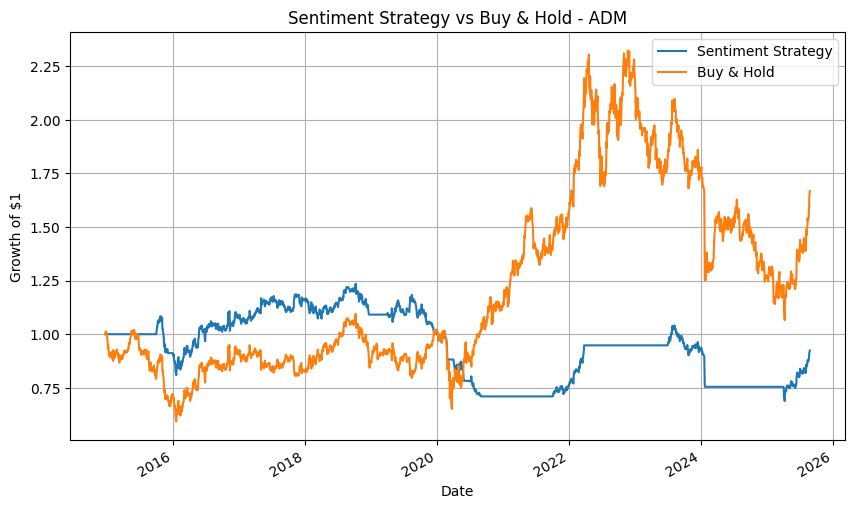

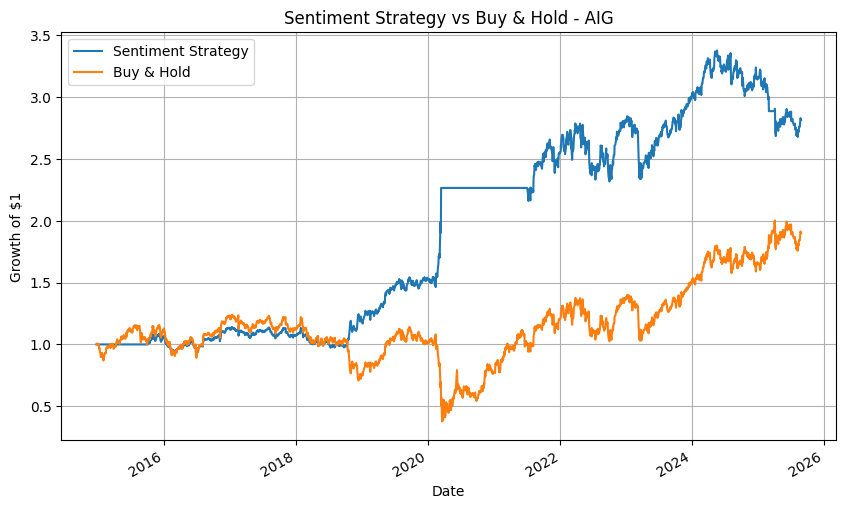

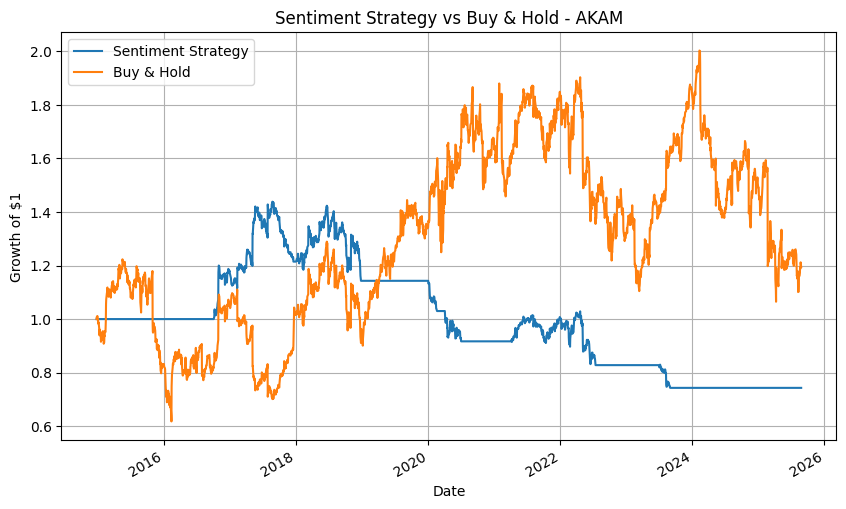

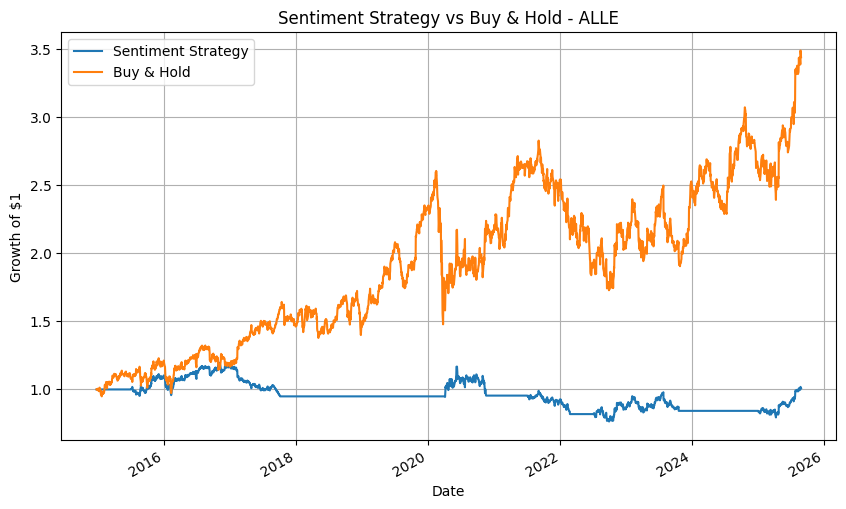

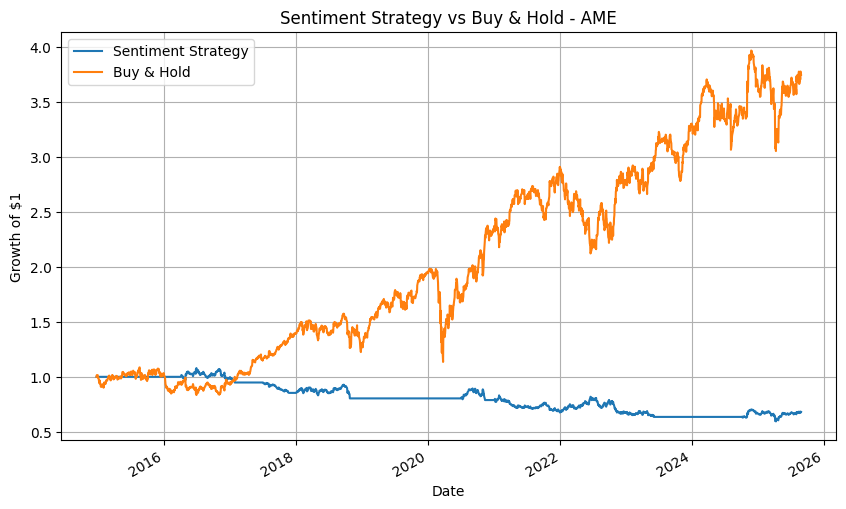

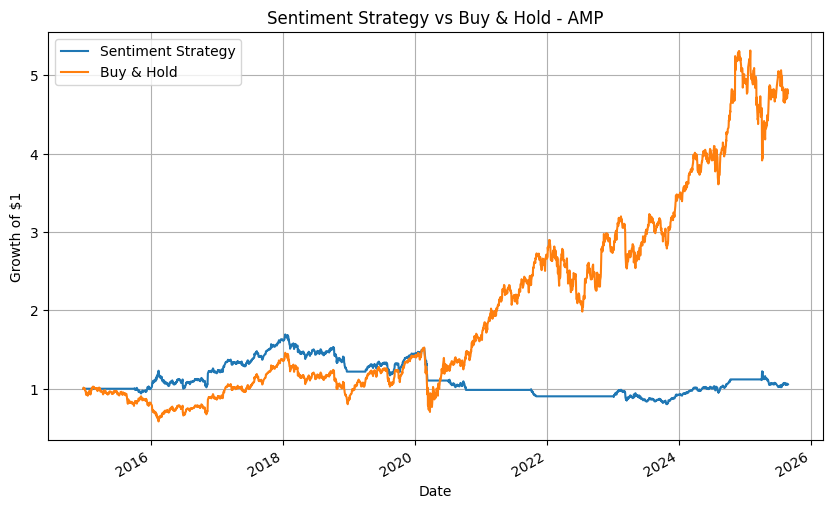

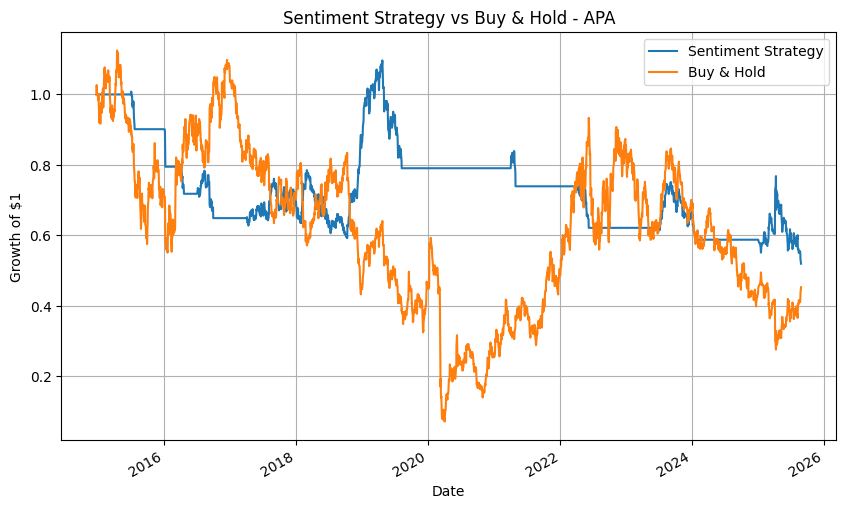

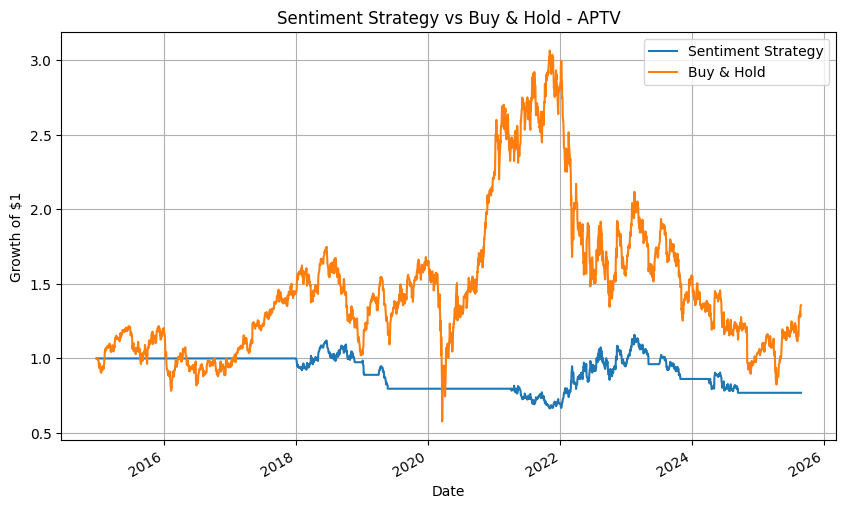

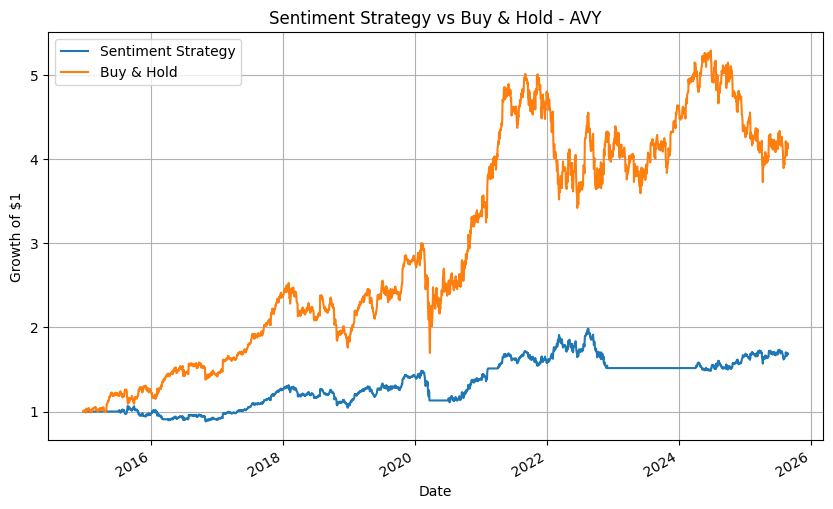

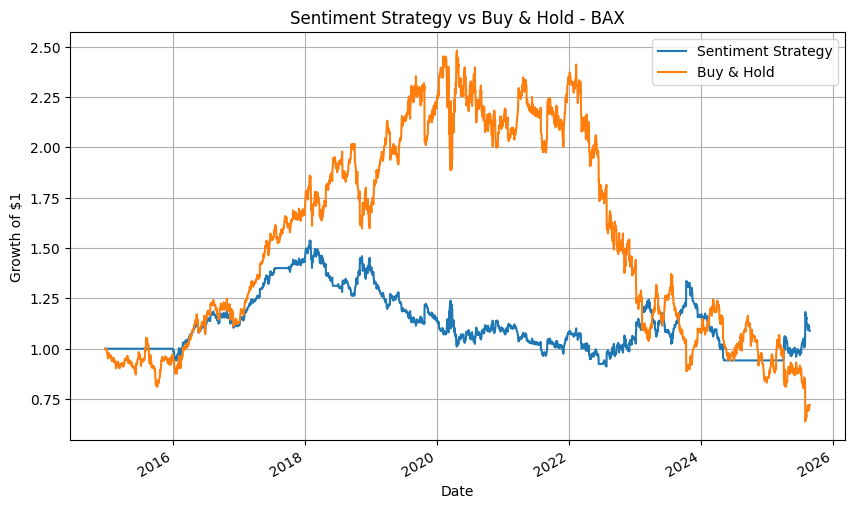

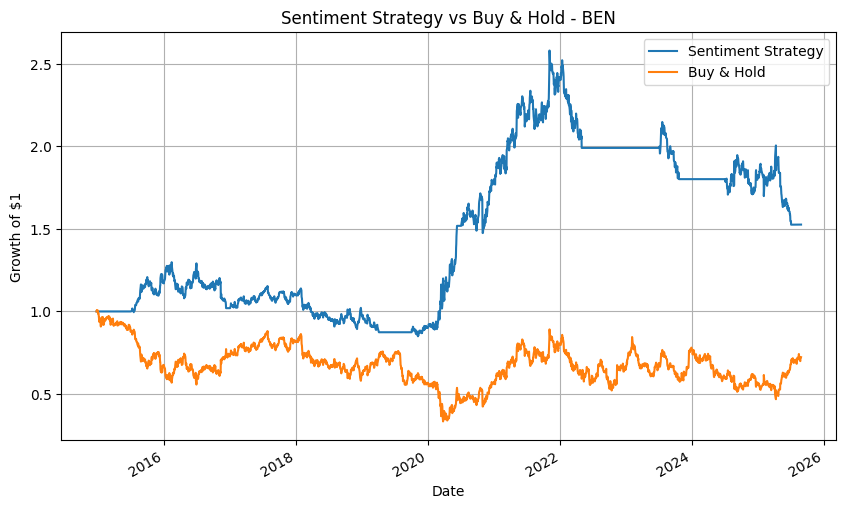

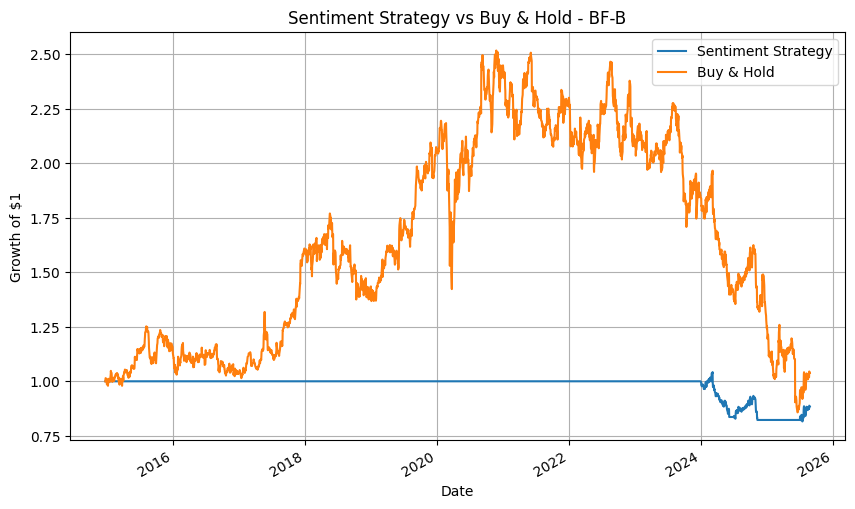

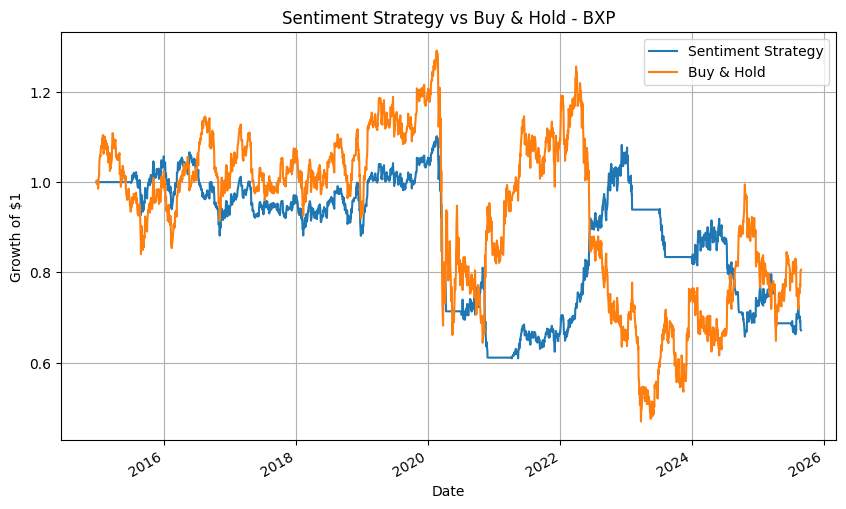

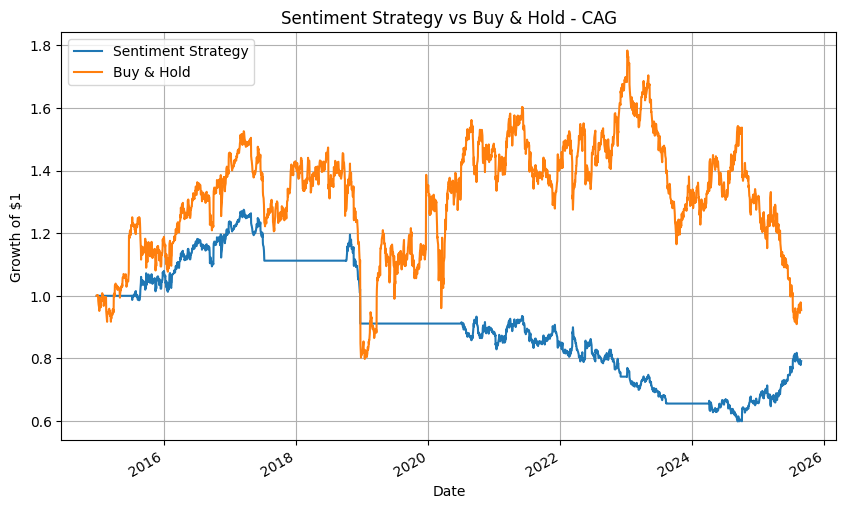

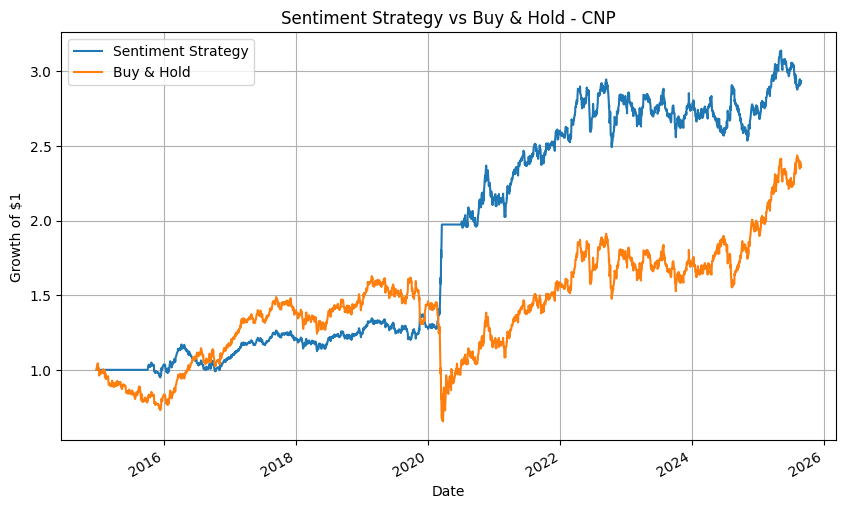

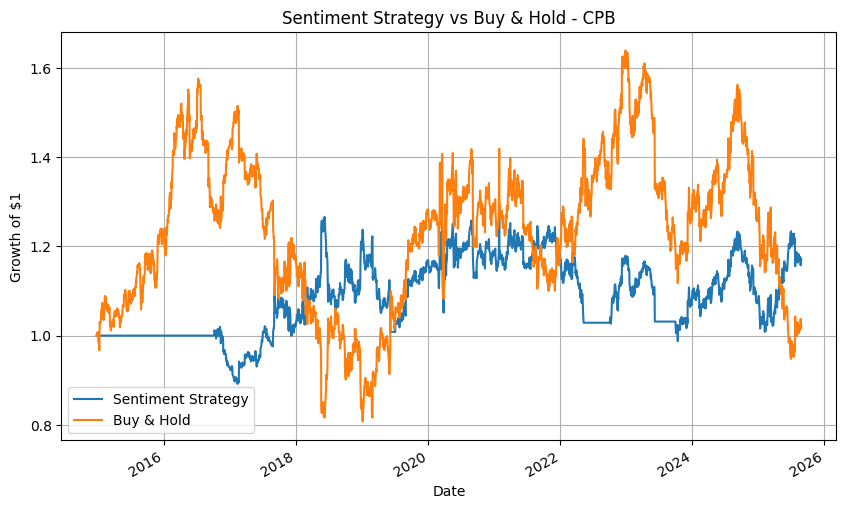

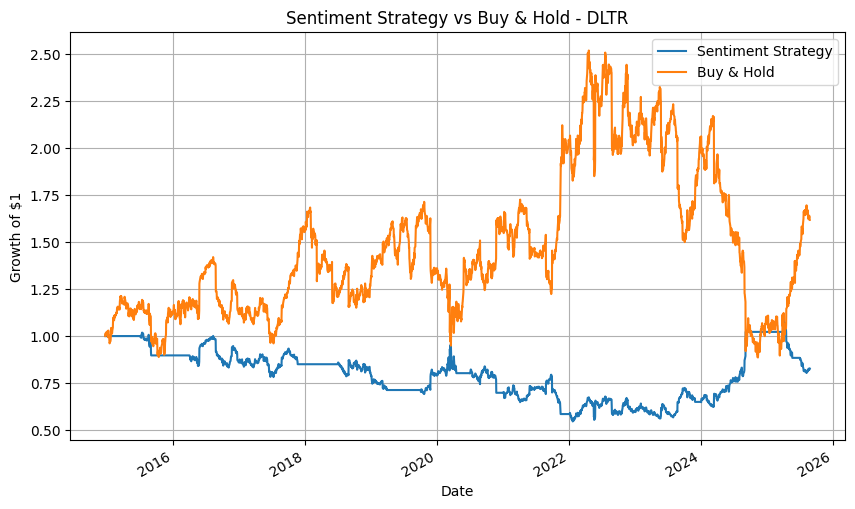

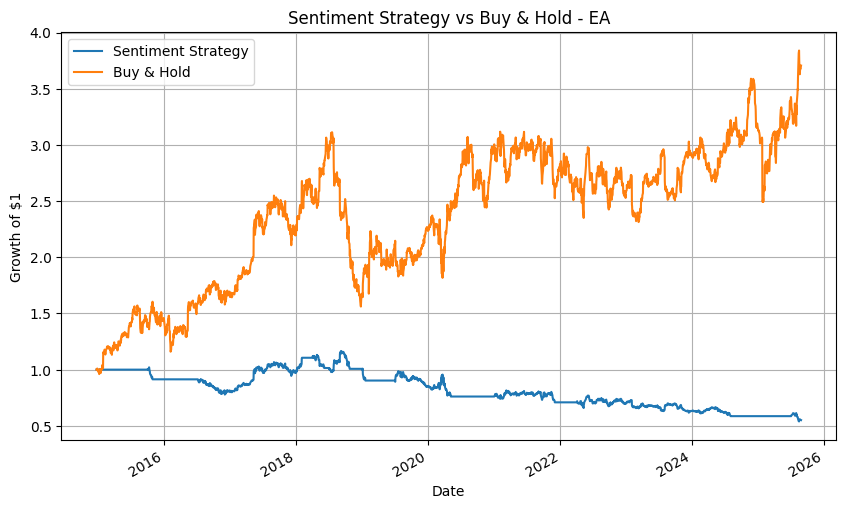

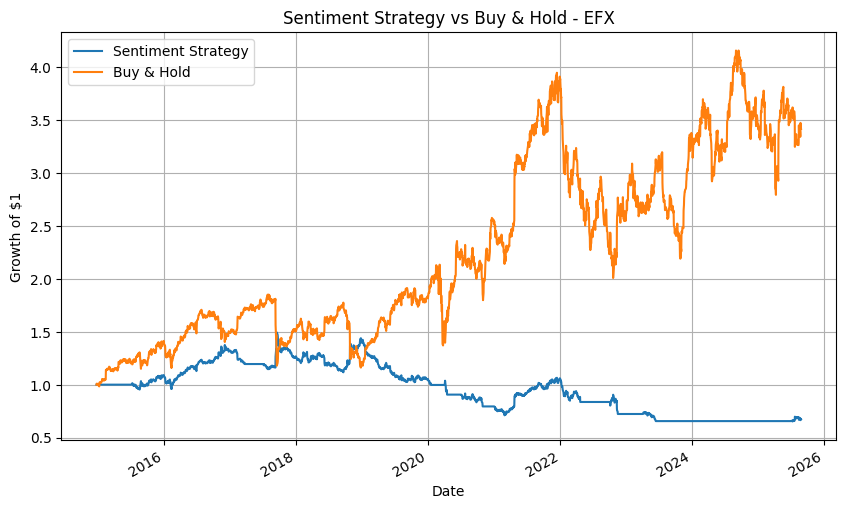

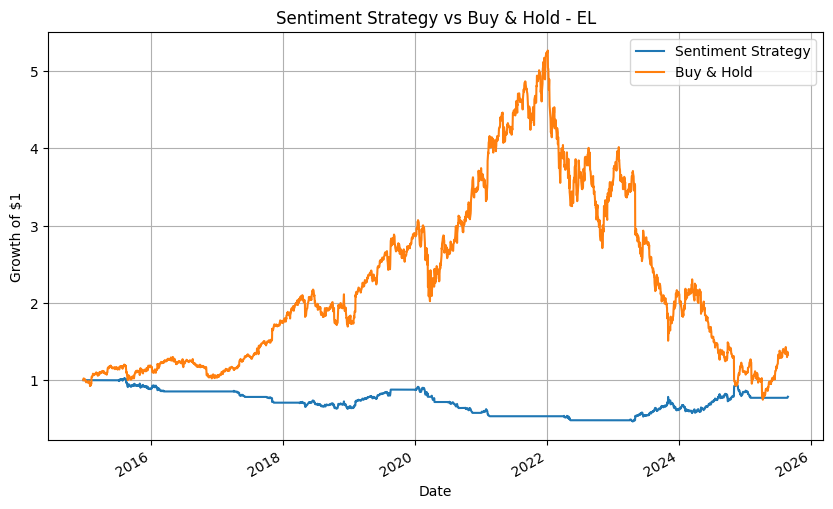

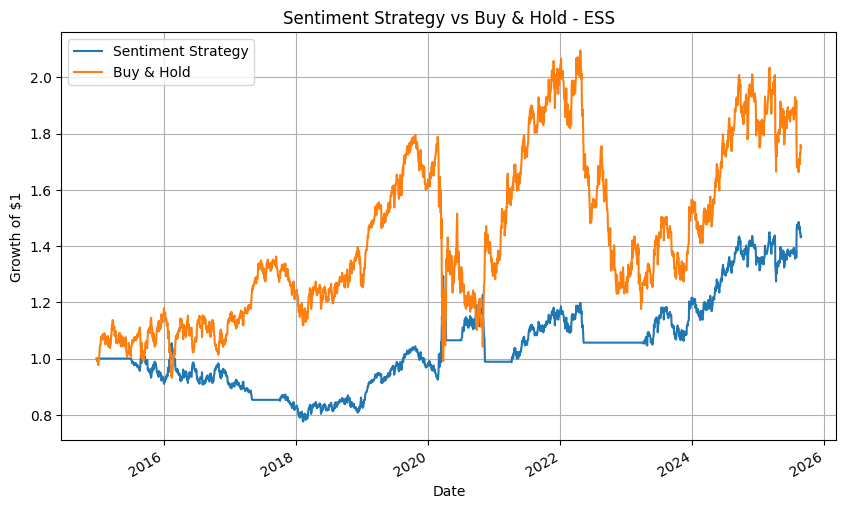

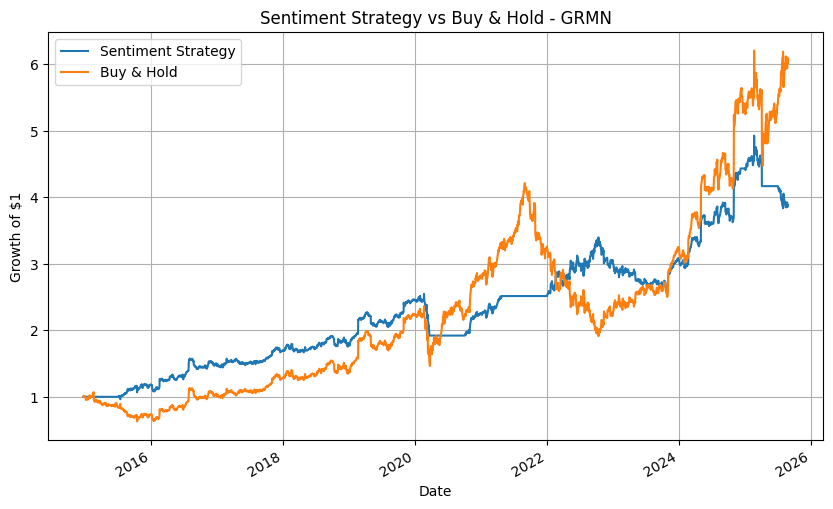

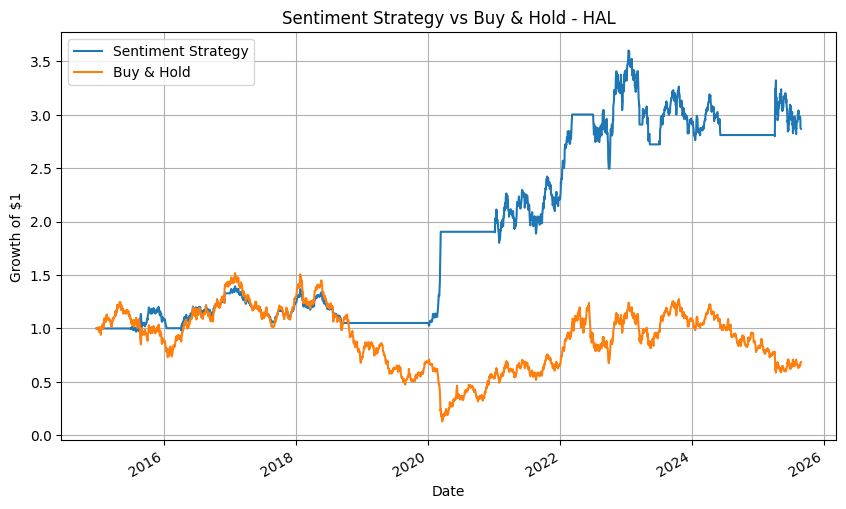

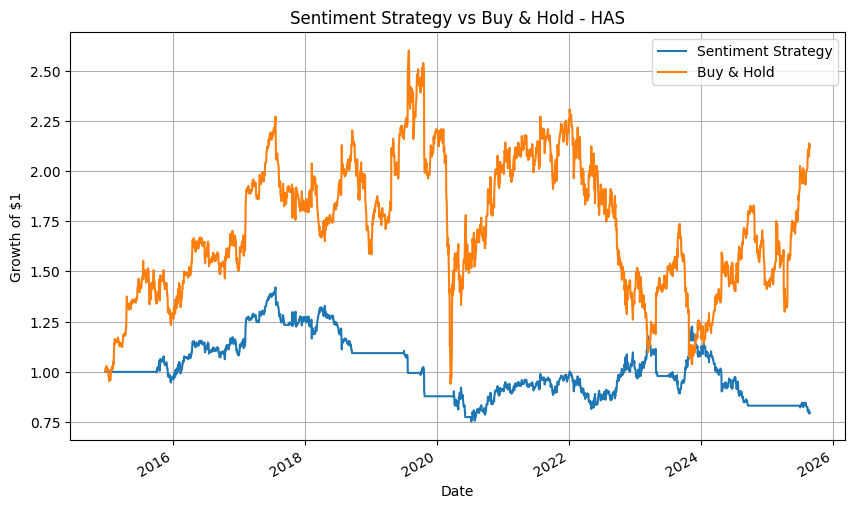

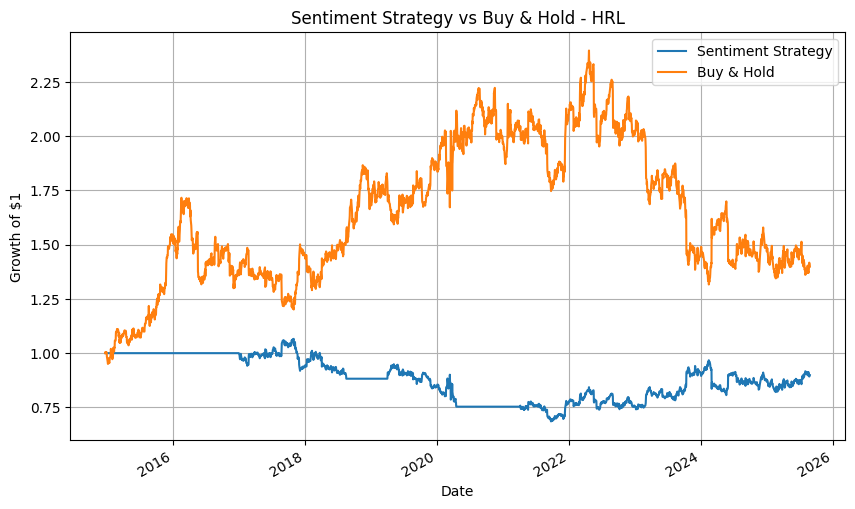

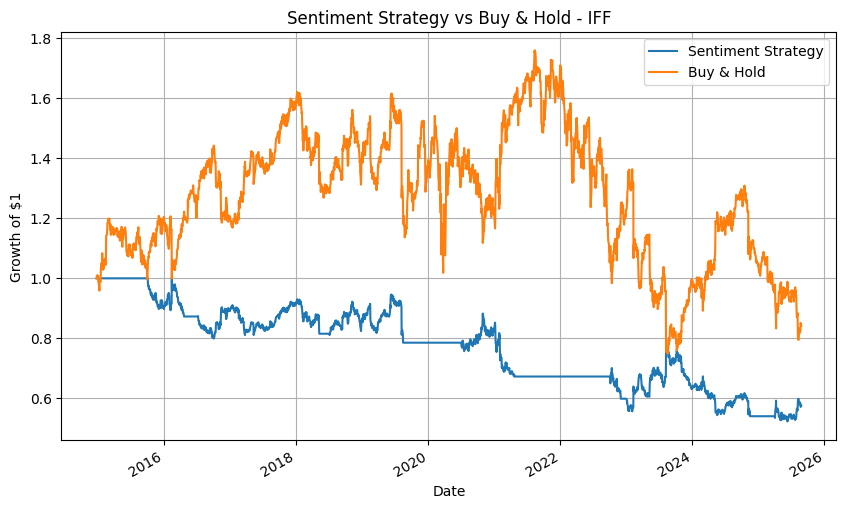

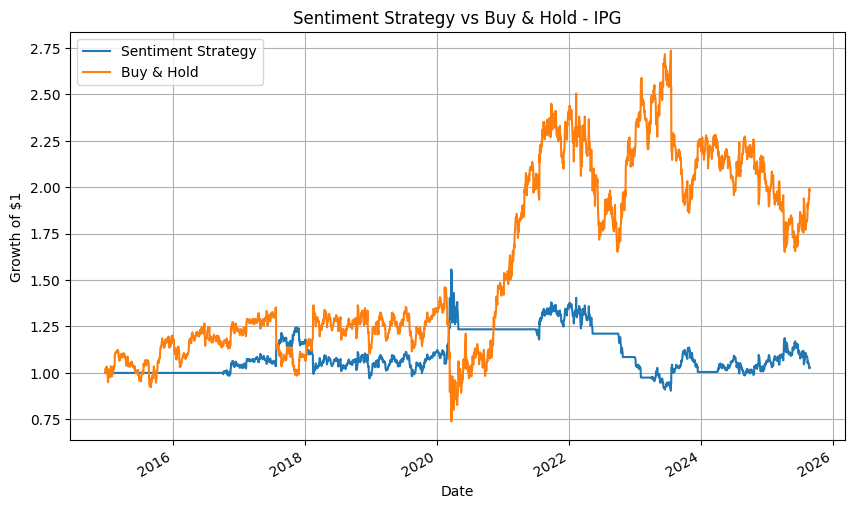

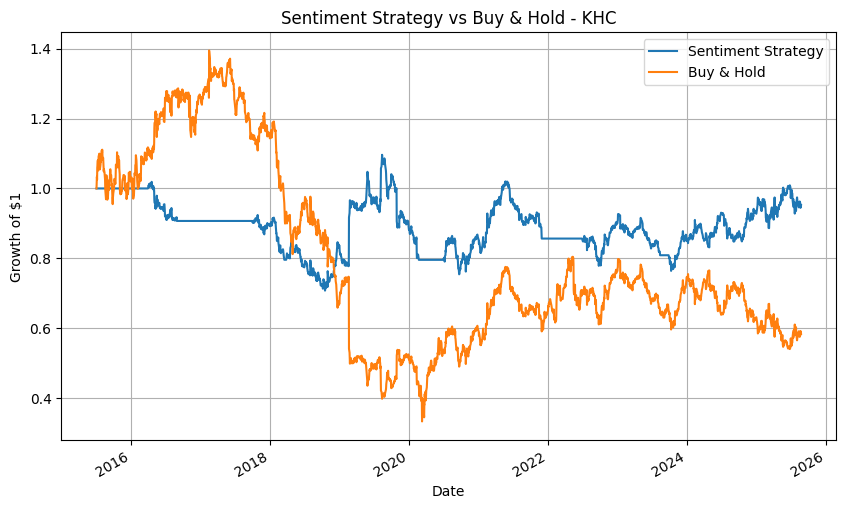

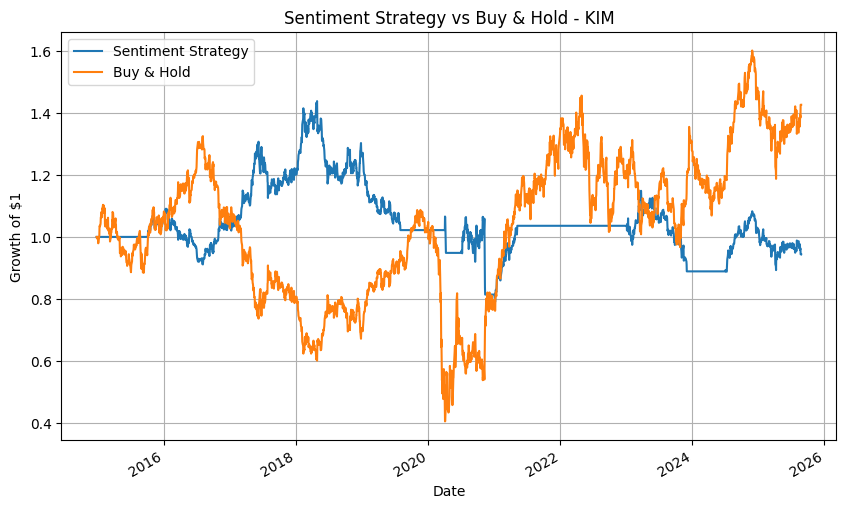

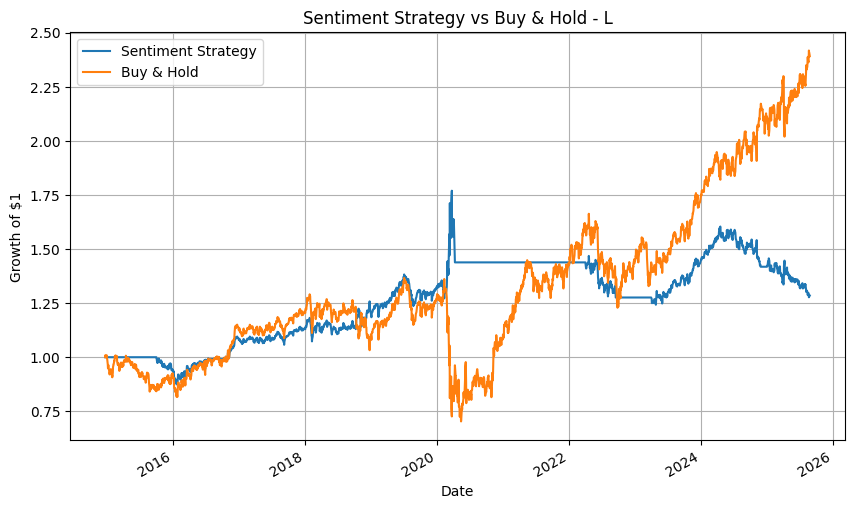

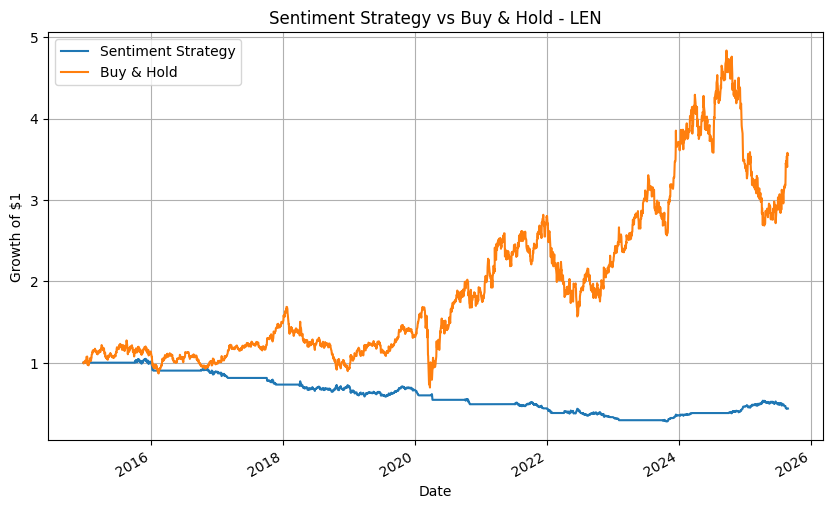

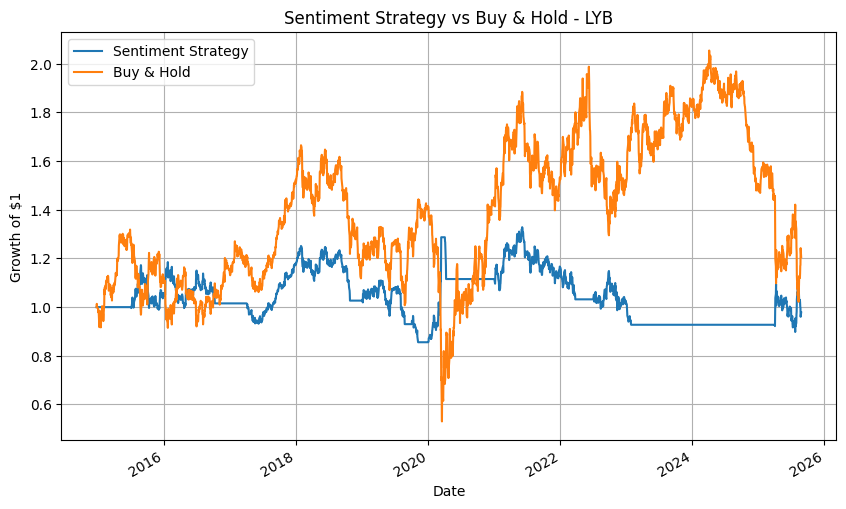

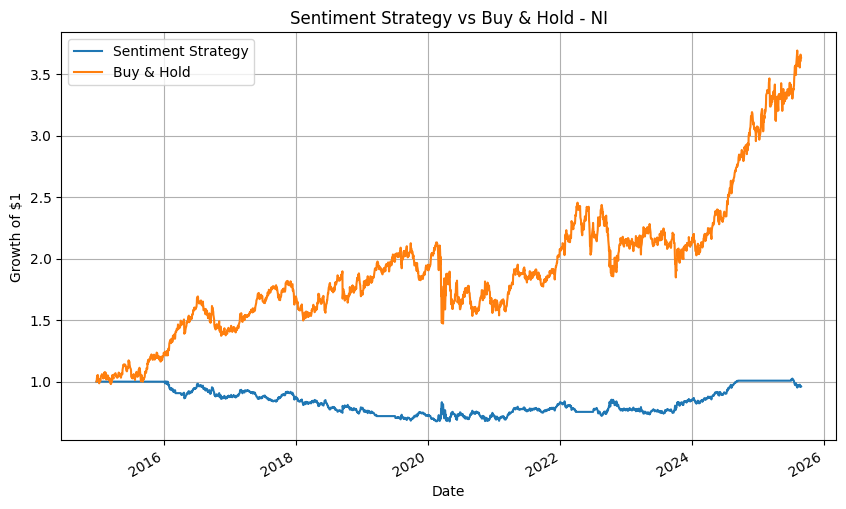

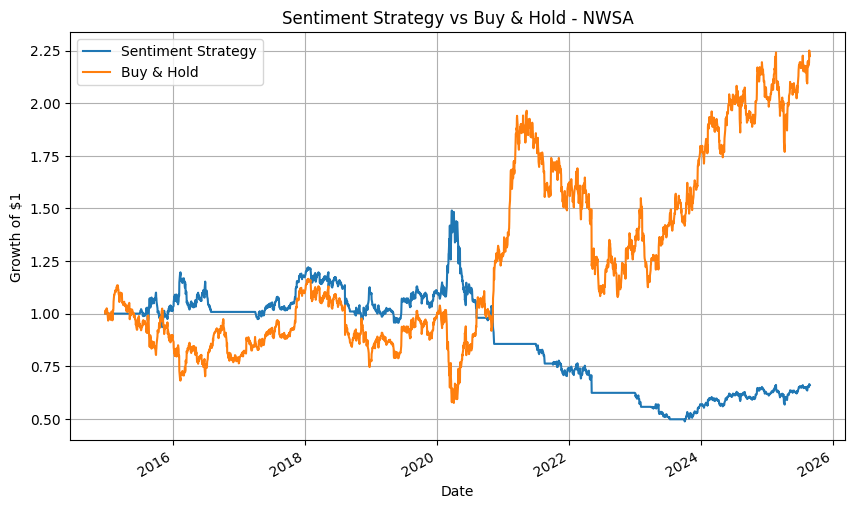

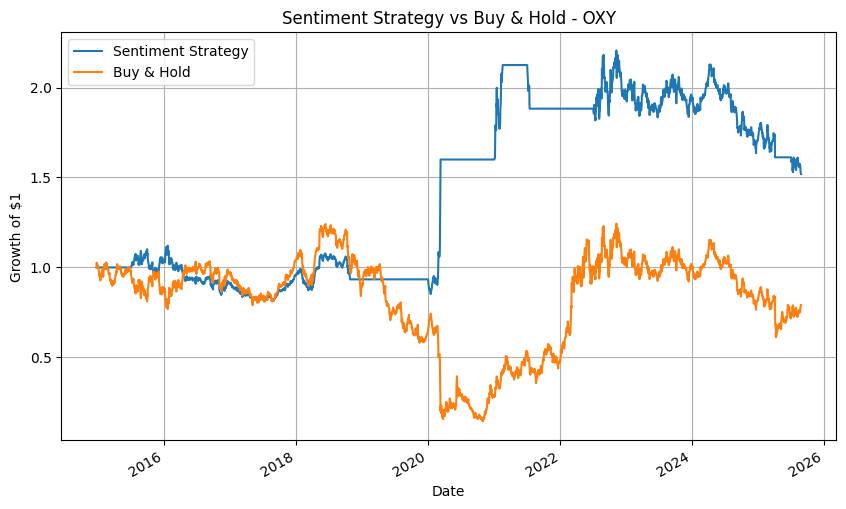

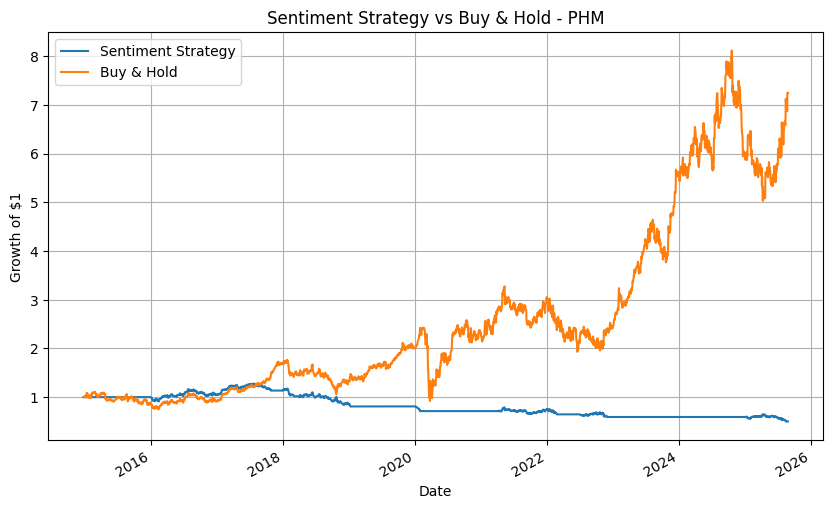

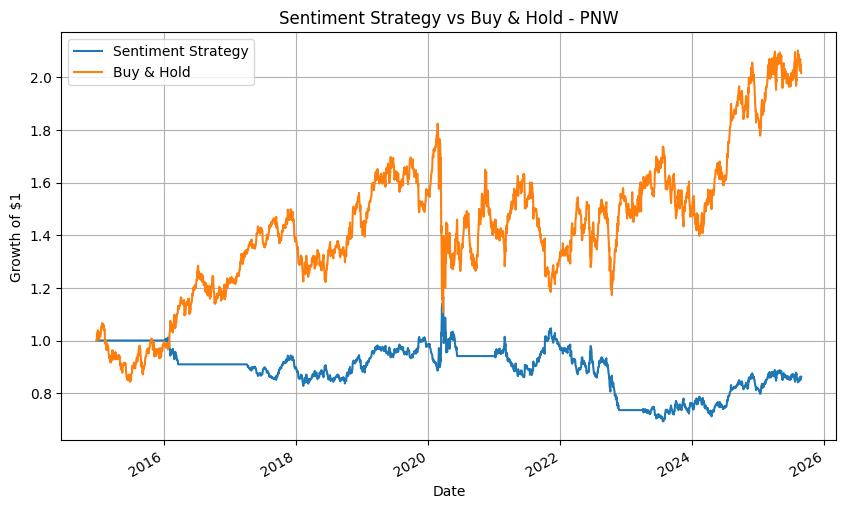

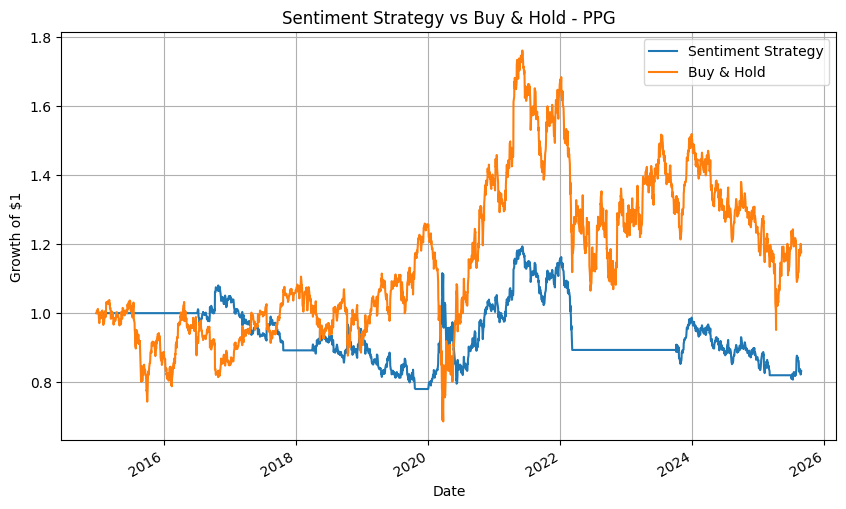

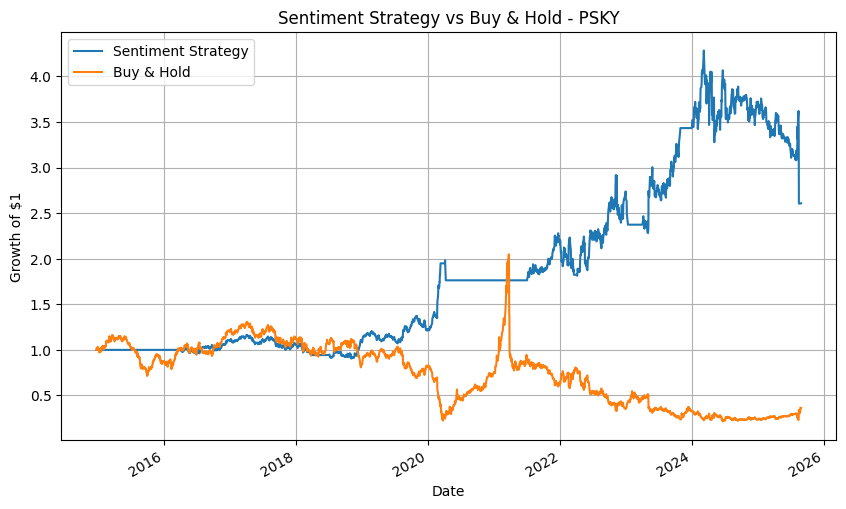

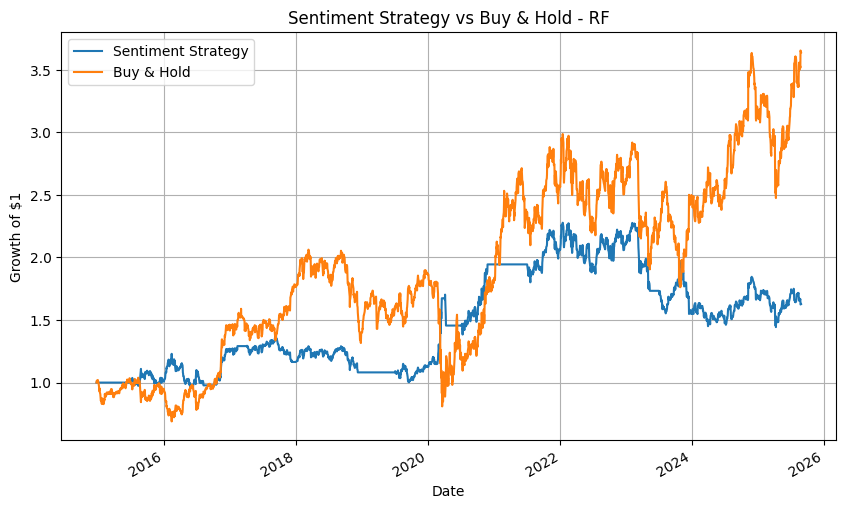

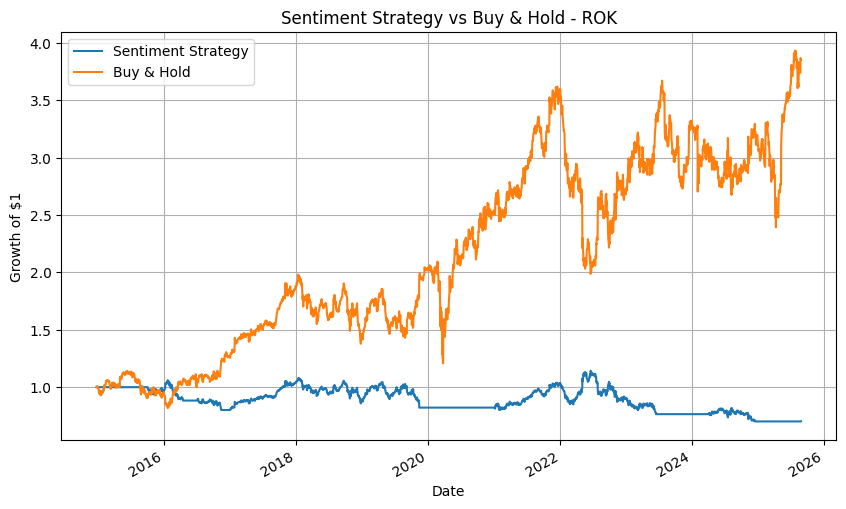

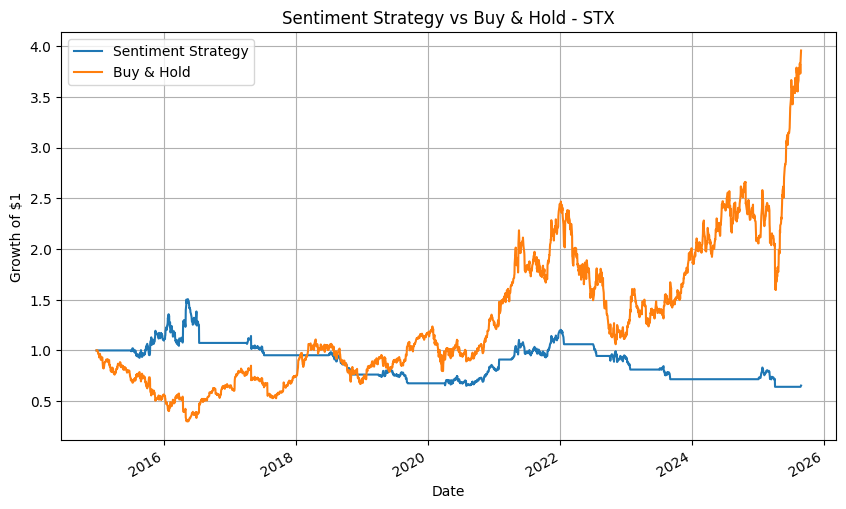

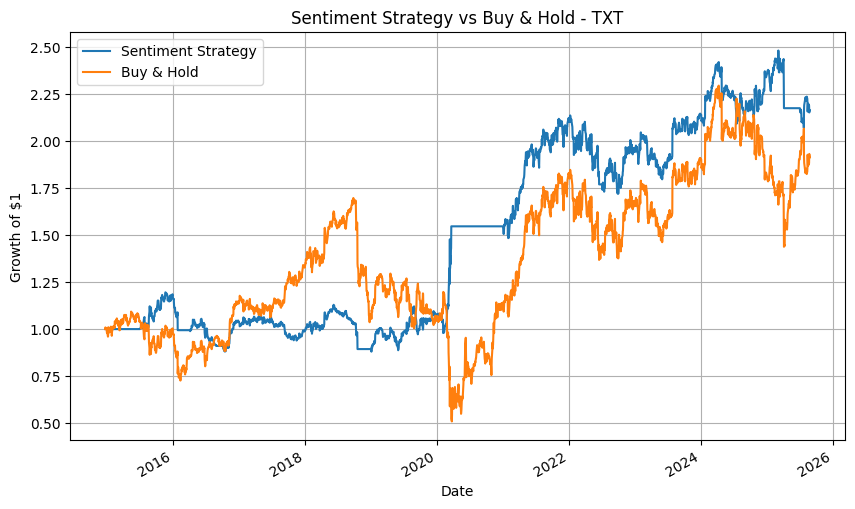

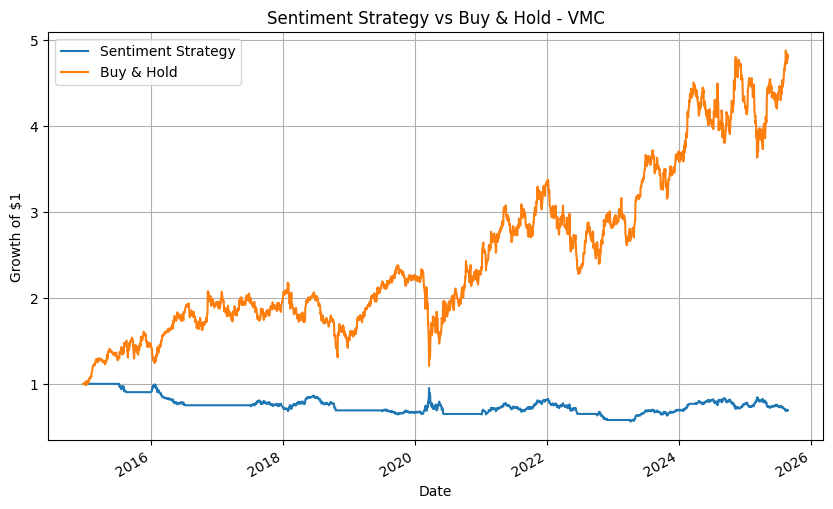

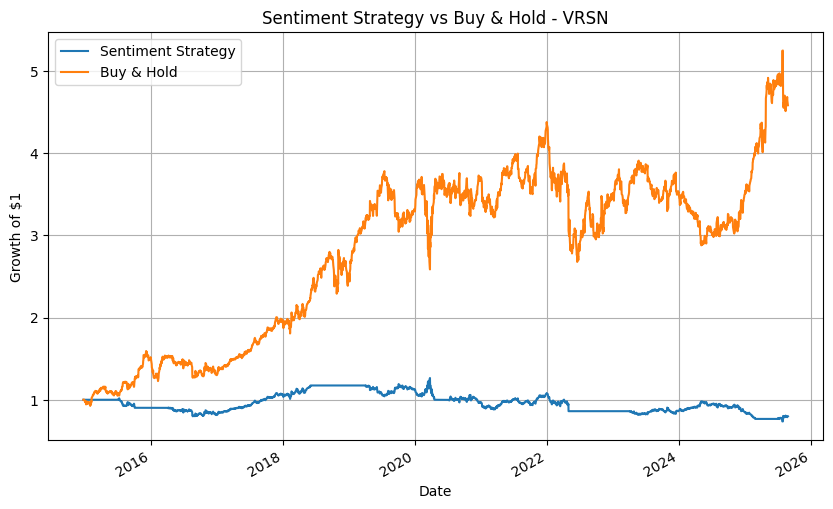

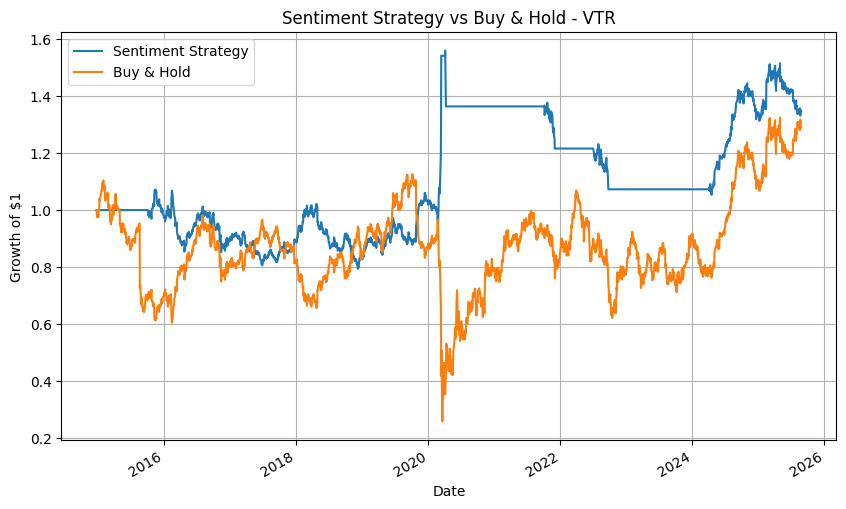

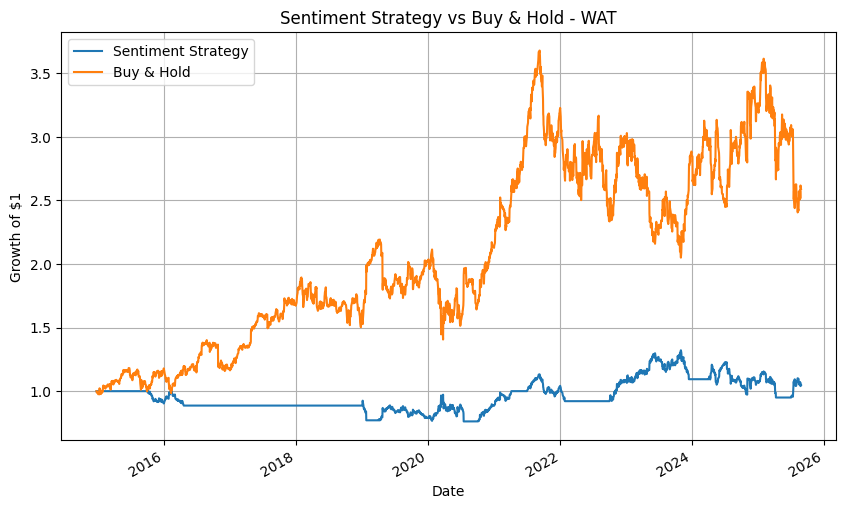

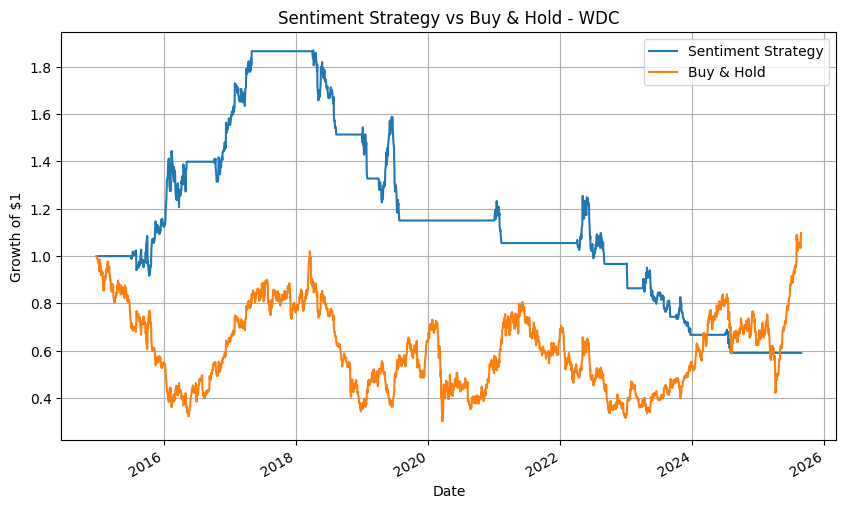

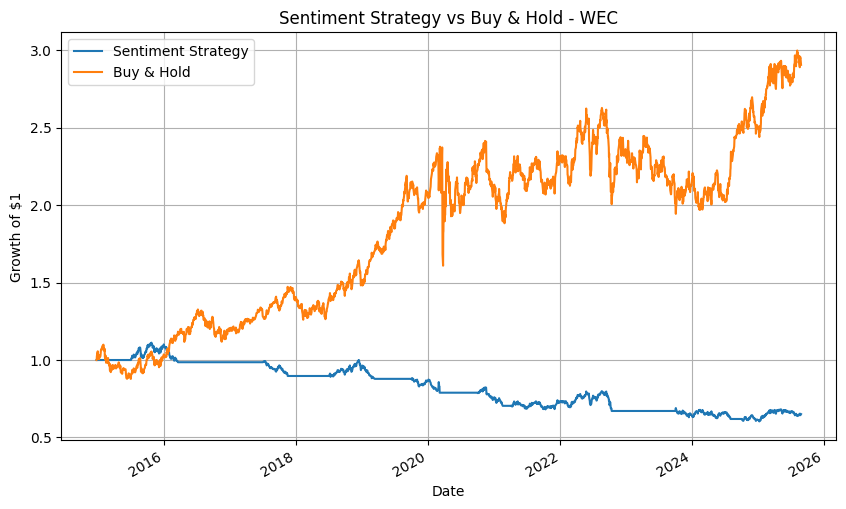

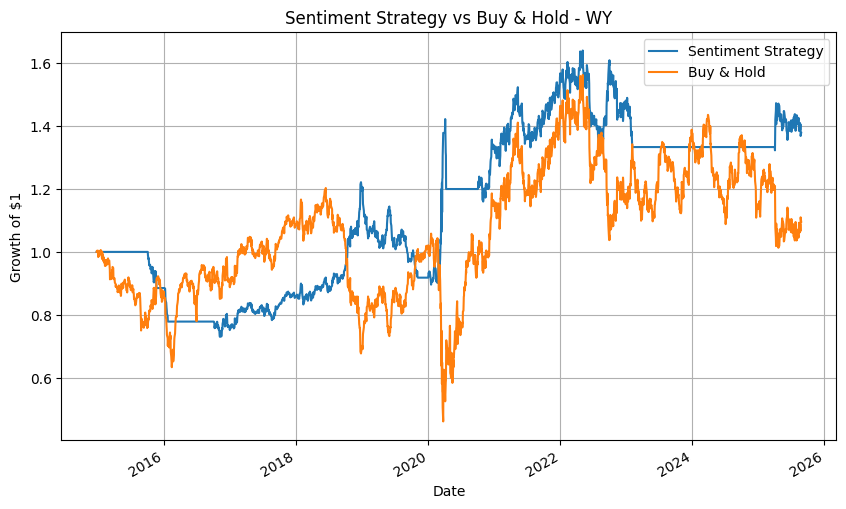

In [45]:
import numpy as np
import pandas as pd

# assumes: earnings_call_df has columns: date (datetime64[ns]), ticker (str), overall_sentiment (float)
# assumes: price_df is a columns=tickers DataFrame of Close prices with a DatetimeIndex

upper, lower = 1, -1  # your z-score thresholds

for ticker in earnings_call_df.ticker.unique():
    # ------------------ guard: ensure we have price history ------------------
    if ticker not in price_df.columns:
        print(f"[{ticker}] no price column; skipping.")
        continue
    px = price_df[ticker].dropna()
    first_px = px.index.min()
    if pd.isna(first_px):
        print(f"[{ticker}] prices all NaN; skipping.")
        continue

    # ------------------ filter events to price-available range ---------------
    ec = (
        earnings_call_df[earnings_call_df.ticker == ticker]
        .sort_values("date")
        .query("date >= @first_px")            # drop pre-IPO (or pre-history) events
        .copy()
    )
    if ec.empty:
        print(f"[{ticker}] no events on/after first price ({first_px.date()}); skipping.")
        continue

    # ------------------ z-score signal without look-ahead --------------------
    ec["mu"]  = ec["overall_sentiment"].shift().expanding().mean()
    ec["sig"] = ec["overall_sentiment"].shift().expanding().std()
    ec["z_overall"] = (ec["overall_sentiment"] - ec["mu"]) / (ec["sig"] + 1e-12)

    ec["signal"] = 0
    ec.loc[ec["z_overall"] >= upper, "signal"] = 1
    ec.loc[ec["z_overall"] <= lower, "signal"] = -1

    # ------------------ entry on NEXT trading day (from each call date) ------
    trading_index = px.index  # only valid dates for this ticker

    def next_trading_day(d):
        # If event date is on/before first trading day, push to first available day
        if d <= trading_index[0]:
            return trading_index[0]
        if d in trading_index:
            i = trading_index.get_loc(d)
            return trading_index[min(i + 1, len(trading_index) - 1)]
        j = trading_index.get_indexer([d], method="bfill")[0]
        return trading_index[j]

    ec["entry_date"] = ec["date"].apply(next_trading_day)

    # ------------------ build positions from first_px onward ------------------
    rets = px.pct_change().fillna(0.0)
    pos = pd.Series(0.0, index=trading_index)

    trade_entries, trade_exits, trade_pnls = [], [], []

    ec_sorted = ec[ec["signal"] != 0].dropna(subset=["entry_date"]).sort_values("entry_date")

    for _, row in ec_sorted.iterrows():
        sig = int(row["signal"])
        entry = row["entry_date"]

        # planned exit = next earnings entry_date (or last date)
        nxt  = ec_sorted.loc[ec_sorted["entry_date"] > entry, "entry_date"].min()
        exit_plan = nxt if pd.notna(nxt) else trading_index[-1]

        entry_price = px.loc[entry]
        best_fav = 0.0
        actual_exit = exit_plan

        # walk from entry to planned exit applying risk rules
        window = pos.loc[entry:exit_plan].index
        for d in window:
            pnl = sig * (px.loc[d] / entry_price - 1.0)
            best_fav = max(best_fav, pnl)

            stopped = False
            if pnl <= -STOP_LOSS:
                actual_exit = d; stopped = True
            elif pnl >= TAKE_PROFIT:
                actual_exit = d; stopped = True
            elif USE_TRAILING and best_fav > 0 and (best_fav - pnl) >= TRAIL_GIVEUP:
                actual_exit = d; stopped = True

            pos.loc[d] = sig * POSITION_SIZE
            if stopped:
                break

        # flat after actual_exit until planned exit
        start = trading_index.get_loc(actual_exit)
        end   = trading_index.get_loc(exit_plan)
        if start + 1 <= end:
            pos.iloc[start+1:end+1] = 0.0

        trade_entries.append(entry)
        trade_exits.append(actual_exit)
        trade_pnls.append(sig * (px.loc[actual_exit] / entry_price - 1.0))

    # ------------------ returns, costs, curves, stats -------------------------
    strategy_daily = (pos * rets).fillna(0.0)

    commission_bp = 2
    per_side_cost = commission_bp / 10000.0
    cost_series = pd.Series(0.0, index=rets.index)
    for d in trade_entries: cost_series.loc[d] -= per_side_cost
    for d in trade_exits:  cost_series.loc[d] -= per_side_cost

    strategy_daily_net = (strategy_daily + cost_series).astype(float)

    # Curves start exactly at first available price for this ticker
    strategy_curve_net = (1 + strategy_daily_net).cumprod().rename("Sentiment Strategy")
    bh_curve = (px / px.iloc[0]).rename("Buy & Hold")

    def max_drawdown(curve):
        peak = curve.cummax()
        return (curve / peak - 1).min()

    def sharpe(daily_ret, rf=0.0, periods=252):
        excess = daily_ret - rf/periods
        return np.sqrt(periods) * excess.mean() / (excess.std(ddof=1) + 1e-12)

    sr = strategy_daily_net
    days_in = (pos != 0)
    stats = {
        "CAGR_strategy": strategy_curve_net.iloc[-1]**(252/len(sr)) - 1 if len(sr) else np.nan,
        "Vol_annualized": sr.std(ddof=1) * np.sqrt(252),
        "Sharpe": sharpe(sr),
        "MaxDD": max_drawdown(strategy_curve_net),
        "HitRate": (pd.Series(trade_pnls) > 0).mean() if trade_pnls else np.nan,
        "Exposure": days_in.mean(),
    }
    print(ticker, stats)

    # Plot from first available price
    plot_df = pd.concat([strategy_curve_net, bh_curve], axis=1)
    ax = plot_df.plot(title=f"Sentiment Strategy vs Buy & Hold - {ticker}", figsize=(10,6))
    ax.set_ylabel("Growth of $1"); ax.grid(True)
